* IE360 SPRING 2024 HOMEWORK 1

Statement of Purpose: The analysis of relationship between Personal Care Products' Price Index statistics and statistics of mascara, perfume, shampoo, various cosmetics markets(Watsons and Sephora), discounts, and dolar from Google Trends. The reason why these parameters are chosen as follows:

1 - Personal Care Products: Mascara, Perfume and Shampoo

These three keywords are chosen to analyze how much they have an affect over Personal Care Products' Price Index since they are the most known and used personal care product types that have different purposes. Due to the different purposes they have, I assumed they might have different effects on the price index, so I chose three of them.

2 - Markets Specialized For Cosmetics: Watsons and Sephora

These two keywords are chosen to analyze if the search amount of cosmetics stores have an affect over Personal Care Products' Price Index. My main question was " If Watsons has been searched over the Internet a lot, does this mean that Personal Care product sales started to increase or not? Does it have an effect over these products' price? " Since Watsons sells cheaper products compared to Sephora, I assumed this price range difference might have a different effect on price index. That's the reason why I chose both of these stores.

3 - Dolar

This keyword was chosen to primaly analyze the effect of dollar's value's rapid rise in our country on Personal Care products since most of these products are exported from other countries and thus, it is highly probable that the value of dollars affects the price of Personal Care Products.

4 - Discounts

This keyword is chosen to analyze if sales have an affect on overall price of personal care products. 

Firstly, all necessary packages are installed.
The data collected from EDVS and Google Trends had been put in a table format in Excel previously, now this Excel table is firstly converted into .csv format for R to read it. Then, the column names in this table are modified. Each set of data is plotted against time below.

In [102]:
hw1data <- read.csv("/Users/serratopaloglu/Desktop/360hw1/DENEME2.csv", sep=";")
colnames(hw1data) <- c("Date","Fiyat","Watsons","Maskara","Dolar","İndirim","Sampuan","Parfüm","Sephora")
head(hw1data)


Date,Fiyat,Watsons,Maskara,Dolar,İndirim,Sampuan,Parfüm,Sephora
2014-03,189.72,14,14,1,20,22,27,7
2014-04,191.74,10,15,1,20,23,29,6
2014-05,194.07,11,15,1,21,23,33,7
2014-06,196.17,14,14,1,21,19,29,7
2014-07,197.23,19,15,1,19,25,31,7
2014-08,198.97,17,14,1,19,26,30,7


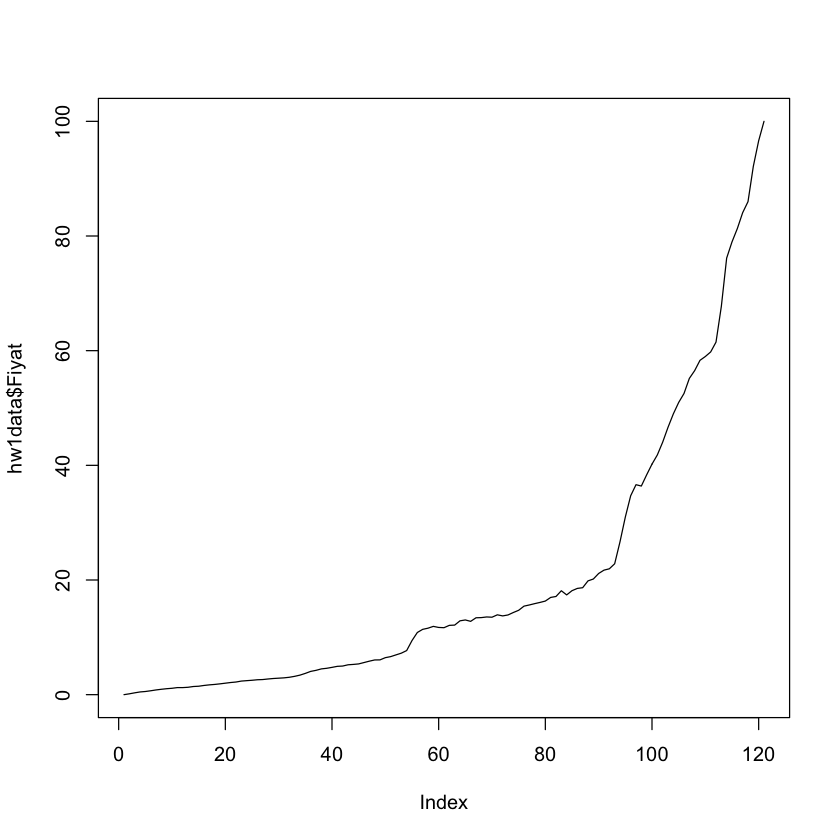

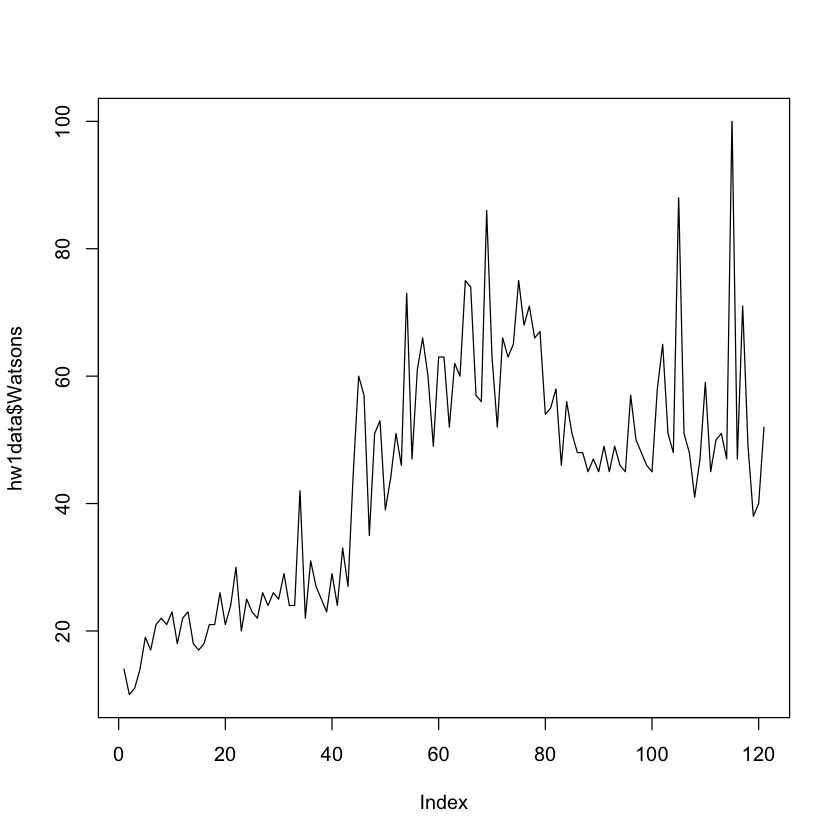

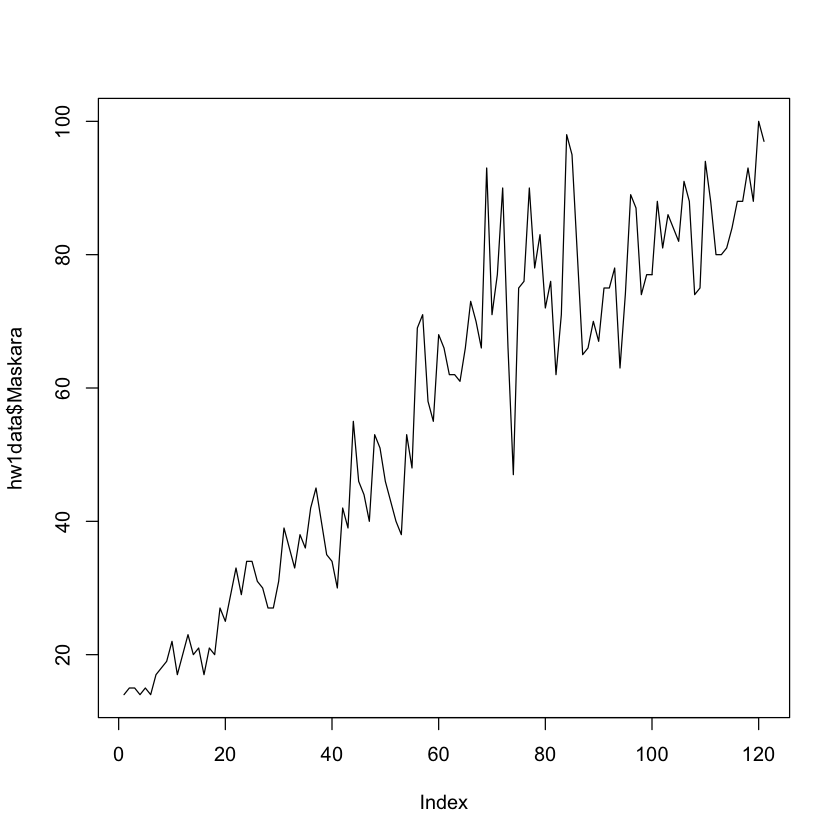

Warning message in title(...):
“conversion failure on 'hw1data$İndirim' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in title(...):
“conversion failure on 'hw1data$İndirim' in 'mbcsToSbcs': dot substituted for <b0>”

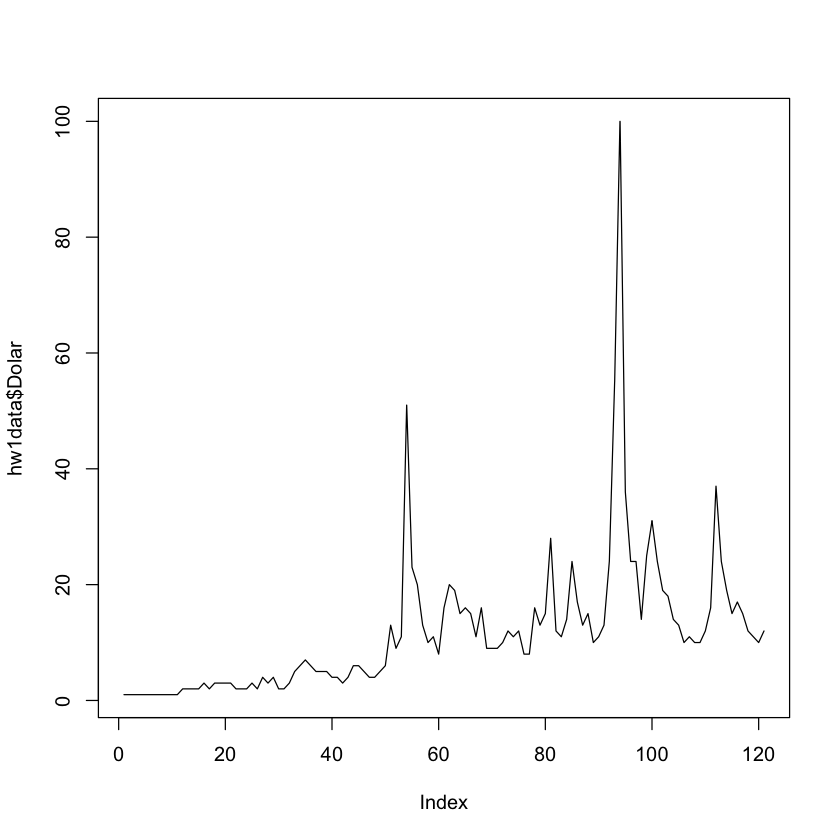

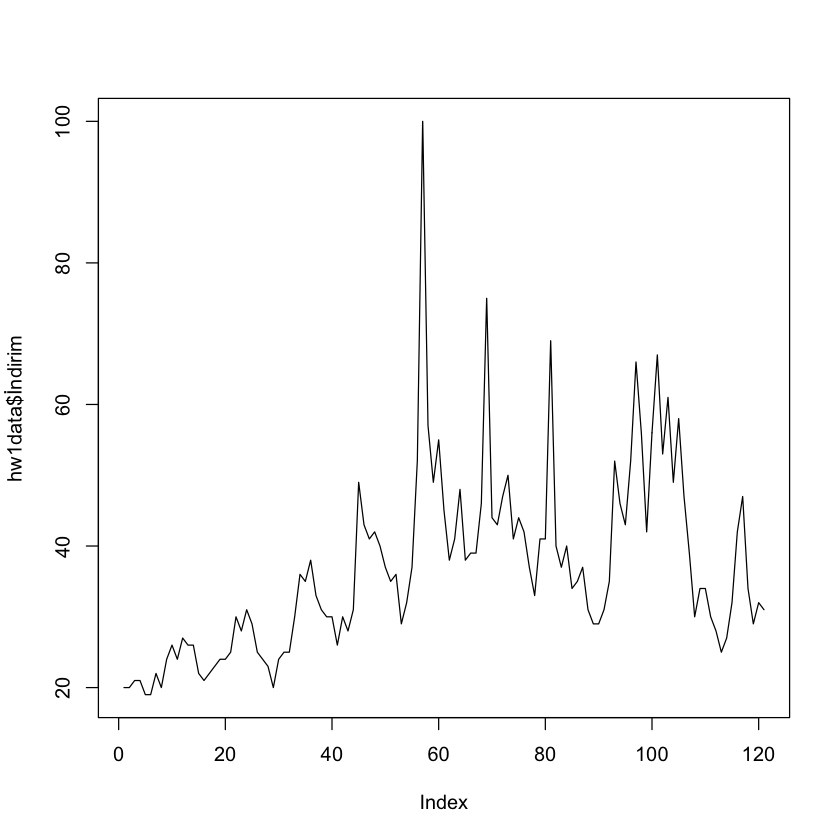

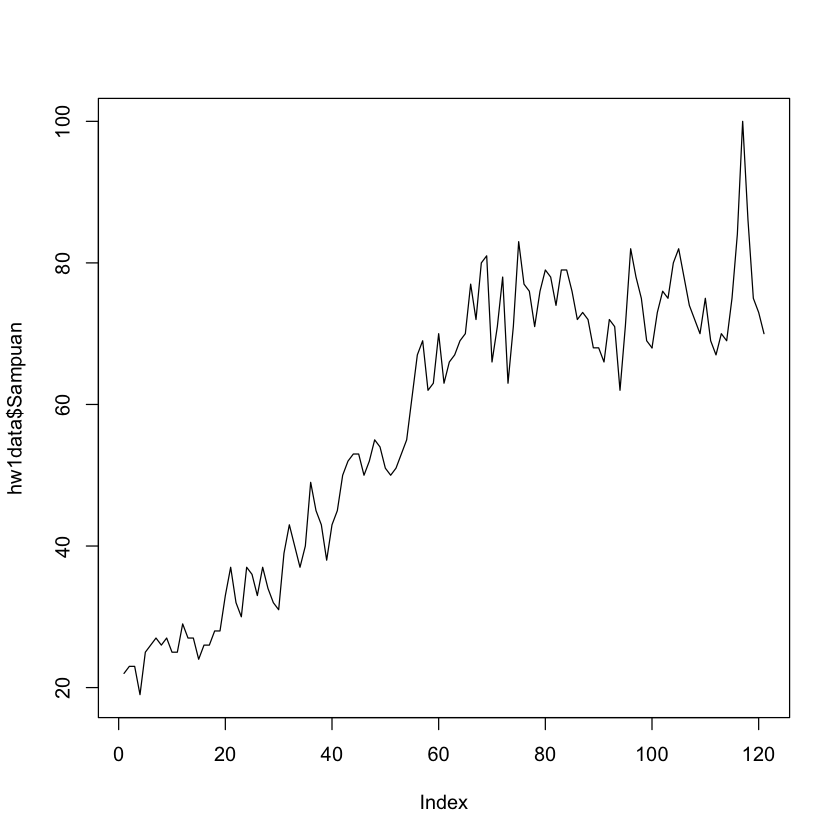

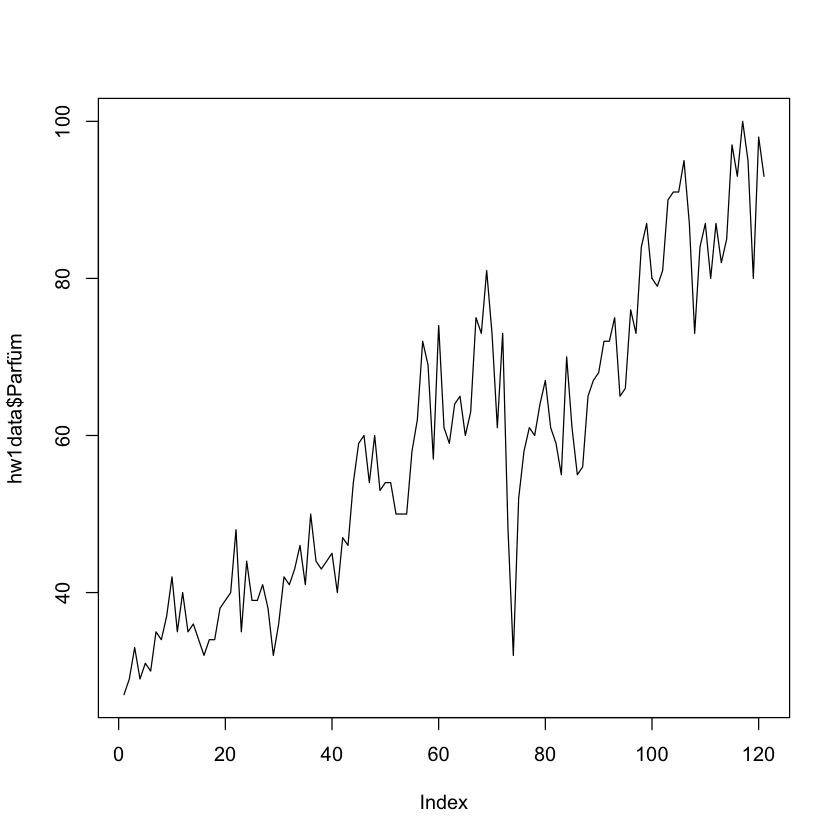

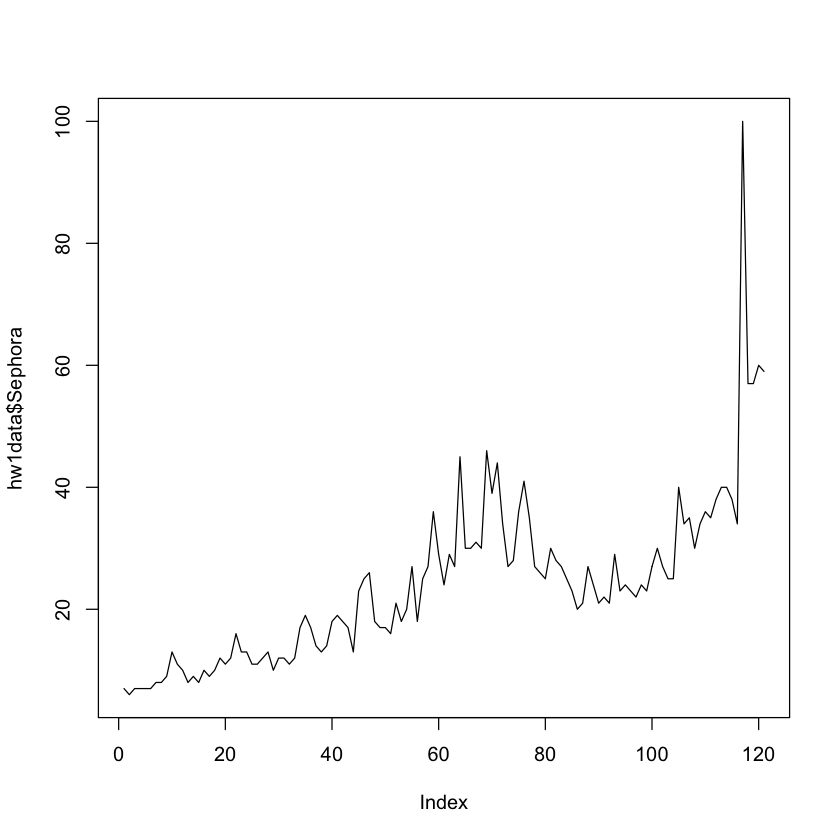

In [153]:
plot(hw1data$Fiyat,type="l")
plot(hw1data$Watsons,type="l")
plot(hw1data$Maskara, type="l")
plot(hw1data$Dolar,type="l")
plot(hw1data$İndirim, type="l")
plot(hw1data$Sampuan,type="l")
plot(hw1data$Parfüm, type="l")
plot(hw1data$Sephora, type="l")

Only from looking to these graphs, we can conclude that Fiyat(Personal Care Product Price Index) has an exponential trend over time which will need modeling later. All the independent variables also have a trend. Dolar, a positive small linear trend.Watsons, starting with a positive linear trend then to a decreasing linear trend.İndirim and Sampuan, starting linear then decreased to being constant. Maskara and Parfüm, linear. Sephora, a positive exponential trend.

Since all data obtained from Google Trends exist between 0 and 100, the dependent variable(Fiyat) is normalized. Now, we can check the summary of our data.

In [104]:
hw1data$Fiyat <- 100*((hw1data$Fiyat -min(hw1data$Fiyat))/(max(hw1data$Fiyat)-min(hw1data$Fiyat)))
summary(hw1data)

      Date         Fiyat            Watsons          Maskara      
 2014-03:  1   Min.   :  0.000   Min.   : 10.00   Min.   : 14.00  
 2014-04:  1   1st Qu.:  2.933   1st Qu.: 25.00   1st Qu.: 34.00  
 2014-05:  1   Median : 11.912   Median : 47.00   Median : 62.00  
 2014-06:  1   Mean   : 19.916   Mean   : 43.82   Mean   : 56.36  
 2014-07:  1   3rd Qu.: 21.720   3rd Qu.: 57.00   3rd Qu.: 77.00  
 2014-08:  1   Max.   :100.000   Max.   :100.00   Max.   :100.00  
 (Other):115                                                      
     Dolar           İndirim          Sampuan           Parfüm     
 Min.   :  1.00   Min.   : 19.00   Min.   : 19.00   Min.   : 27.0  
 1st Qu.:  3.00   1st Qu.: 27.00   1st Qu.: 37.00   1st Qu.: 41.0  
 Median : 10.00   Median : 34.00   Median : 66.00   Median : 59.0  
 Mean   : 11.69   Mean   : 36.64   Mean   : 56.94   Mean   : 58.7  
 3rd Qu.: 15.00   3rd Qu.: 43.00   3rd Qu.: 73.00   3rd Qu.: 73.0  
 Max.   :100.00   Max.   :100.00   Max.   :100.00   Max.

Now, it is necessary to examine the correlations between independent variable pairs to see if there is any one that could cause multicollienarity. 

In [105]:
num.cols2 <- sapply(hw1data, is.numeric)
cor.data2 <- cor(hw1data[,num.cols2])
print(cor.data2)

            Fiyat   Watsons   Maskara     Dolar   İndirim   Sampuan    Parfüm
Fiyat   1.0000000 0.4092595 0.7323660 0.3293462 0.2101800 0.6423663 0.8404616
Watsons 0.4092595 1.0000000 0.7809538 0.4211303 0.6676289 0.8391617 0.6922268
Maskara 0.7323660 0.7809538 1.0000000 0.4913568 0.5966897 0.9491590 0.9059376
Dolar   0.3293462 0.4211303 0.4913568 1.0000000 0.3869783 0.4899409 0.4485428
İndirim 0.2101800 0.6676289 0.5966897 0.3869783 1.0000000 0.6472773 0.5588179
Sampuan 0.6423663 0.8391617 0.9491590 0.4899409 0.6472773 1.0000000 0.8579284
Parfüm  0.8404616 0.6922268 0.9059376 0.4485428 0.5588179 0.8579284 1.0000000
Sephora 0.7652083 0.6553944 0.7623086 0.2946206 0.4144658 0.7761518 0.7835364
          Sephora
Fiyat   0.7652083
Watsons 0.6553944
Maskara 0.7623086
Dolar   0.2946206
İndirim 0.4144658
Sampuan 0.7761518
Parfüm  0.7835364
Sephora 1.0000000


Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İnd

$corr
            Fiyat   Watsons   Maskara     Dolar   İndirim   Sampuan    Parfüm
Fiyat   1.0000000 0.4092595 0.7323660 0.3293462 0.2101800 0.6423663 0.8404616
Watsons 0.4092595 1.0000000 0.7809538 0.4211303 0.6676289 0.8391617 0.6922268
Maskara 0.7323660 0.7809538 1.0000000 0.4913568 0.5966897 0.9491590 0.9059376
Dolar   0.3293462 0.4211303 0.4913568 1.0000000 0.3869783 0.4899409 0.4485428
İndirim 0.2101800 0.6676289 0.5966897 0.3869783 1.0000000 0.6472773 0.5588179
Sampuan 0.6423663 0.8391617 0.9491590 0.4899409 0.6472773 1.0000000 0.8579284
Parfüm  0.8404616 0.6922268 0.9059376 0.4485428 0.5588179 0.8579284 1.0000000
Sephora 0.7652083 0.6553944 0.7623086 0.2946206 0.4144658 0.7761518 0.7835364
          Sephora
Fiyat   0.7652083
Watsons 0.6553944
Maskara 0.7623086
Dolar   0.2946206
İndirim 0.4144658
Sampuan 0.7761518
Parfüm  0.7835364
Sephora 1.0000000

$corrPos
     xName   yName x y      corr
1    Fiyat   Fiyat 1 8 1.0000000
2    Fiyat Watsons 1 7 0.4092595
3    Fiyat Maskara 1 

Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İnd

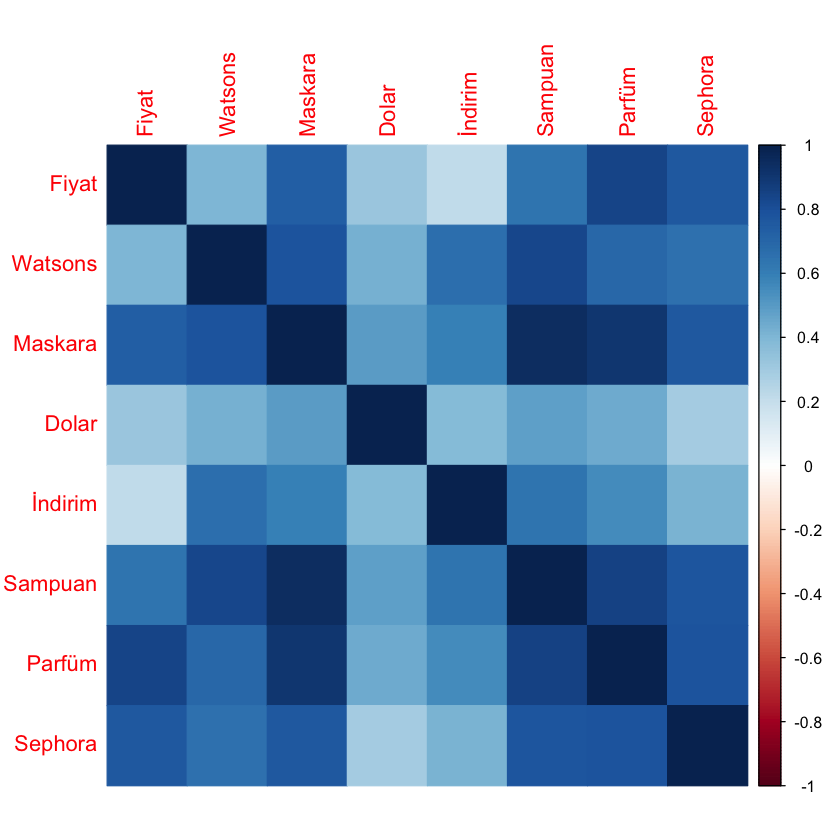

$corr
            Fiyat   Watsons   Maskara     Dolar   İndirim   Sampuan    Parfüm
Fiyat   1.0000000 0.4092595 0.7323660 0.3293462 0.2101800 0.6423663 0.8404616
Watsons 0.4092595 1.0000000 0.7809538 0.4211303 0.6676289 0.8391617 0.6922268
Maskara 0.7323660 0.7809538 1.0000000 0.4913568 0.5966897 0.9491590 0.9059376
Dolar   0.3293462 0.4211303 0.4913568 1.0000000 0.3869783 0.4899409 0.4485428
İndirim 0.2101800 0.6676289 0.5966897 0.3869783 1.0000000 0.6472773 0.5588179
Sampuan 0.6423663 0.8391617 0.9491590 0.4899409 0.6472773 1.0000000 0.8579284
Parfüm  0.8404616 0.6922268 0.9059376 0.4485428 0.5588179 0.8579284 1.0000000
Sephora 0.7652083 0.6553944 0.7623086 0.2946206 0.4144658 0.7761518 0.7835364
          Sephora
Fiyat   0.7652083
Watsons 0.6553944
Maskara 0.7623086
Dolar   0.2946206
İndirim 0.4144658
Sampuan 0.7761518
Parfüm  0.7835364
Sephora 1.0000000

$corrPos
     xName   yName x y      corr
1    Fiyat   Fiyat 1 8 1.0000000
2    Fiyat Watsons 1 7 0.4092595
3    Fiyat Maskara 1 

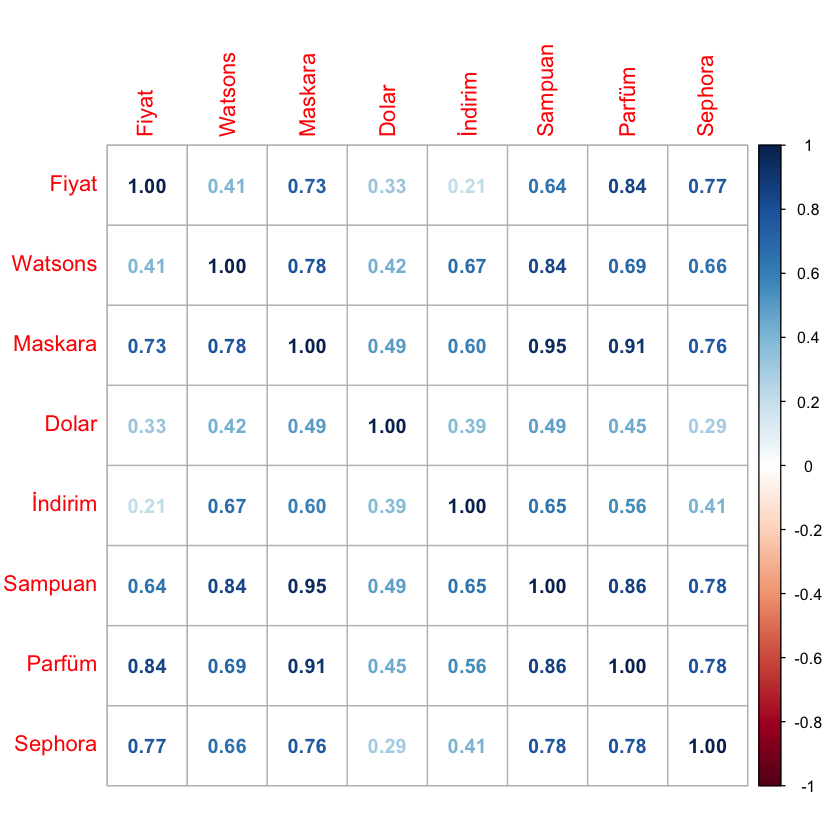

In [110]:
library(corrplot)
print(corrplot(cor.data2,method="color", tl.cex = 1.1, cl.cex=0.8))
print(corrplot(cor.data2,method="number", tl.cex = 1.1, cl.cex=0.8))

It can be clearly seen that a lot of pairs have correlation greater than 0.5 which is a sign of multicollienarity. The greatest correlation values can be detected in all the pairs with Maskara and Parfüm. Firstly, we will try to extract these two variables from our model, then check correlations again.

Date,Fiyat,Watsons,Dolar,İndirim,Sampuan,Sephora
2014-03,0.0000000,14,1,20,22,7
2014-04,0.1483255,10,1,20,23,6
2014-05,0.3194137,11,1,21,23,7
2014-06,0.4736135,14,1,21,19,7
2014-07,0.5514476,19,1,19,25,7
2014-08,0.6792131,17,1,19,26,7


            Fiyat   Watsons     Dolar   İndirim   Sampuan   Sephora
Fiyat   1.0000000 0.4092595 0.3293462 0.2101800 0.6423663 0.7652083
Watsons 0.4092595 1.0000000 0.4211303 0.6676289 0.8391617 0.6553944
Dolar   0.3293462 0.4211303 1.0000000 0.3869783 0.4899409 0.2946206
İndirim 0.2101800 0.6676289 0.3869783 1.0000000 0.6472773 0.4144658
Sampuan 0.6423663 0.8391617 0.4899409 0.6472773 1.0000000 0.7761518
Sephora 0.7652083 0.6553944 0.2946206 0.4144658 0.7761518 1.0000000


Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İnd

$corr
            Fiyat   Watsons     Dolar   İndirim   Sampuan   Sephora
Fiyat   1.0000000 0.4092595 0.3293462 0.2101800 0.6423663 0.7652083
Watsons 0.4092595 1.0000000 0.4211303 0.6676289 0.8391617 0.6553944
Dolar   0.3293462 0.4211303 1.0000000 0.3869783 0.4899409 0.2946206
İndirim 0.2101800 0.6676289 0.3869783 1.0000000 0.6472773 0.4144658
Sampuan 0.6423663 0.8391617 0.4899409 0.6472773 1.0000000 0.7761518
Sephora 0.7652083 0.6553944 0.2946206 0.4144658 0.7761518 1.0000000

$corrPos
     xName   yName x y      corr
1    Fiyat   Fiyat 1 6 1.0000000
2    Fiyat Watsons 1 5 0.4092595
3    Fiyat   Dolar 1 4 0.3293462
4    Fiyat İndirim 1 3 0.2101800
5    Fiyat Sampuan 1 2 0.6423663
6    Fiyat Sephora 1 1 0.7652083
7  Watsons   Fiyat 2 6 0.4092595
8  Watsons Watsons 2 5 1.0000000
9  Watsons   Dolar 2 4 0.4211303
10 Watsons İndirim 2 3 0.6676289
11 Watsons Sampuan 2 2 0.8391617
12 Watsons Sephora 2 1 0.6553944
13   Dolar   Fiyat 3 6 0.3293462
14   Dolar Watsons 3 5 0.4211303
15   Dolar   

Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İndirim' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İnd

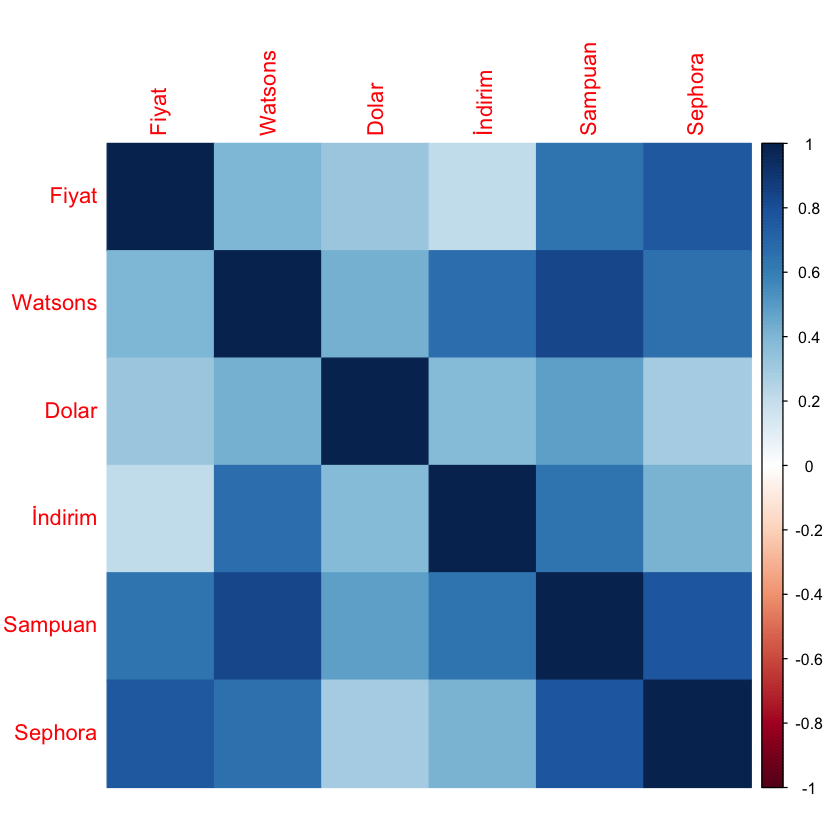

$corr
            Fiyat   Watsons     Dolar   İndirim   Sampuan   Sephora
Fiyat   1.0000000 0.4092595 0.3293462 0.2101800 0.6423663 0.7652083
Watsons 0.4092595 1.0000000 0.4211303 0.6676289 0.8391617 0.6553944
Dolar   0.3293462 0.4211303 1.0000000 0.3869783 0.4899409 0.2946206
İndirim 0.2101800 0.6676289 0.3869783 1.0000000 0.6472773 0.4144658
Sampuan 0.6423663 0.8391617 0.4899409 0.6472773 1.0000000 0.7761518
Sephora 0.7652083 0.6553944 0.2946206 0.4144658 0.7761518 1.0000000

$corrPos
     xName   yName x y      corr
1    Fiyat   Fiyat 1 6 1.0000000
2    Fiyat Watsons 1 5 0.4092595
3    Fiyat   Dolar 1 4 0.3293462
4    Fiyat İndirim 1 3 0.2101800
5    Fiyat Sampuan 1 2 0.6423663
6    Fiyat Sephora 1 1 0.7652083
7  Watsons   Fiyat 2 6 0.4092595
8  Watsons Watsons 2 5 1.0000000
9  Watsons   Dolar 2 4 0.4211303
10 Watsons İndirim 2 3 0.6676289
11 Watsons Sampuan 2 2 0.8391617
12 Watsons Sephora 2 1 0.6553944
13   Dolar   Fiyat 3 6 0.3293462
14   Dolar Watsons 3 5 0.4211303
15   Dolar   

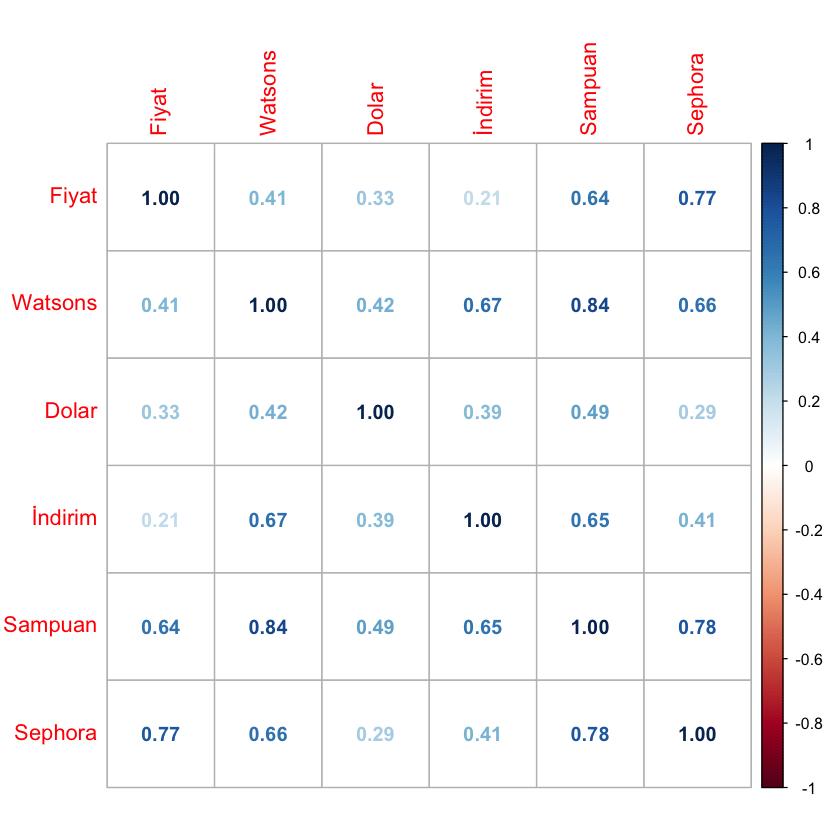

In [113]:
hwdata3 <- read.csv("/Users/serratopaloglu/Desktop/360hw1/deneme2.1.csv", sep=";")
colnames(hwdata3) <- c("Date","Fiyat","Watsons","Dolar","İndirim","Sampuan","Sephora")
hwdata3$Fiyat <- 100*((hwdata3$Fiyat -min(hwdata3$Fiyat))/(max(hwdata3$Fiyat)-min(hwdata3$Fiyat)))
head(hwdata3)
# Calculating Correlations on the new data set
num.cols2 <- sapply(hwdata3, is.numeric)
cor.data2 <- cor(hwdata3[,num.cols2])
print(cor.data2)
library(corrplot)
print(corrplot(cor.data2,method="color", tl.cex = 1.1, cl.cex=0.8))
print(corrplot(cor.data2,method="number", tl.cex = 1.1, cl.cex=0.8))

At this point, it is clear that Sampuan and Watsons variables continue to have high correlations with other independent variables. Since the assignment requires the student to establish the model of the dependent variable with at least 3 independent variables that have correlation less than 0.5 ,  I have decided to add new independent variables to my model. These variables were chosen as İşsizlik, Cilt Bakımı and Ramazan key words. My reasoning for adding these variables to my model can be ordered as follows:

1 - İşsizlik also known as Unemployement Rate, can affect the price index of Personal Care products. In a country with high unemployement rates and a worsening economy, the value of money decreases and people choose not to spend their money on personal care products to save money for their mandatory needs such as food, rent etc. 

2 - Cilt Bakımı also known as Skin Care, is a relatively new term to our lives with various skin care products being manufactured and sold all around the world. With the high success of social media advertisements, people can go and purchase any skin care product that they see on online advertisements. 

3- Ramazan is a holiday where major sales are conducted by cosmetic shops and drugstores such as Gratis, Watsons and Sephora similar to Black Friday. Thus, the days of this holiday has an affect on the sales of cosmetics and personal care products. 

In [39]:
hw11data <- read.csv("/Users/serratopaloglu/Desktop/360hw1/deneme33.csv", sep=";")
colnames(hw11data) <- c("Date","Fiyat","Dolar","Sephora","Ramazan","İssizlik","CiltBakım")
head(hw11data)

Date,Fiyat,Dolar,Sephora,Ramazan,İssizlik,CiltBakım
2014-03,189.72,1,7,7,17,80
2014-04,191.74,1,6,9,18,77
2014-05,194.07,1,7,12,18,73
2014-06,196.17,1,7,31,19,73
2014-07,197.23,1,7,35,19,74
2014-08,198.97,1,7,6,17,72


Warning message in title(...):
“conversion failure on 'hw11data$İssizlik' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in title(...):
“conversion failure on 'hw11data$İssizlik' in 'mbcsToSbcs': dot substituted for <b0>”

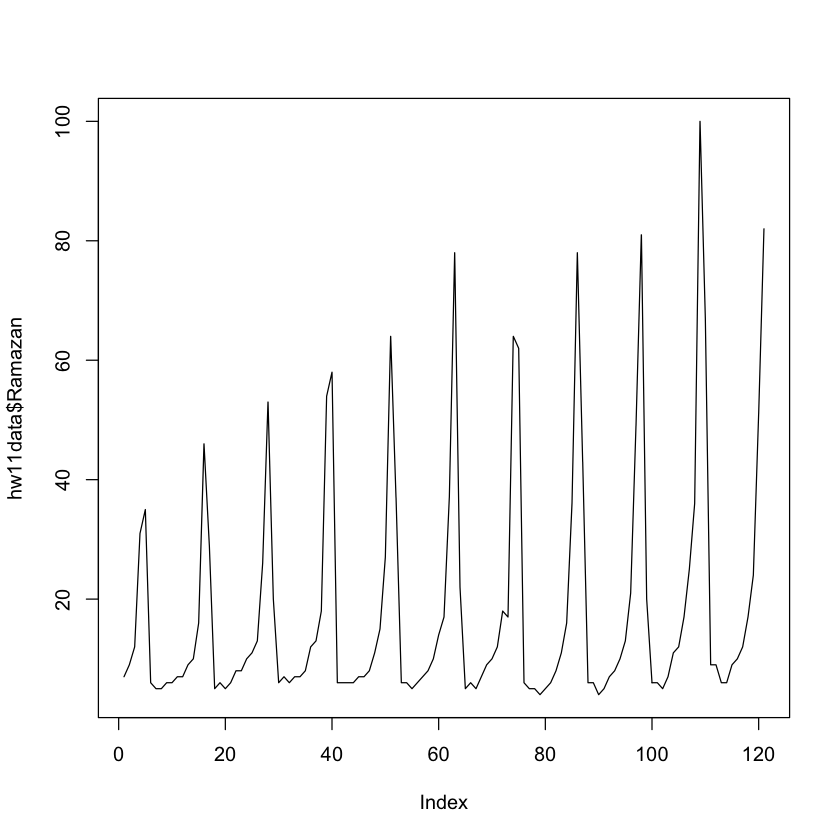

Warning message in title(...):
“conversion failure on 'hw11data$CiltBakım' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in title(...):
“conversion failure on 'hw11data$CiltBakım' in 'mbcsToSbcs': dot substituted for <b1>”

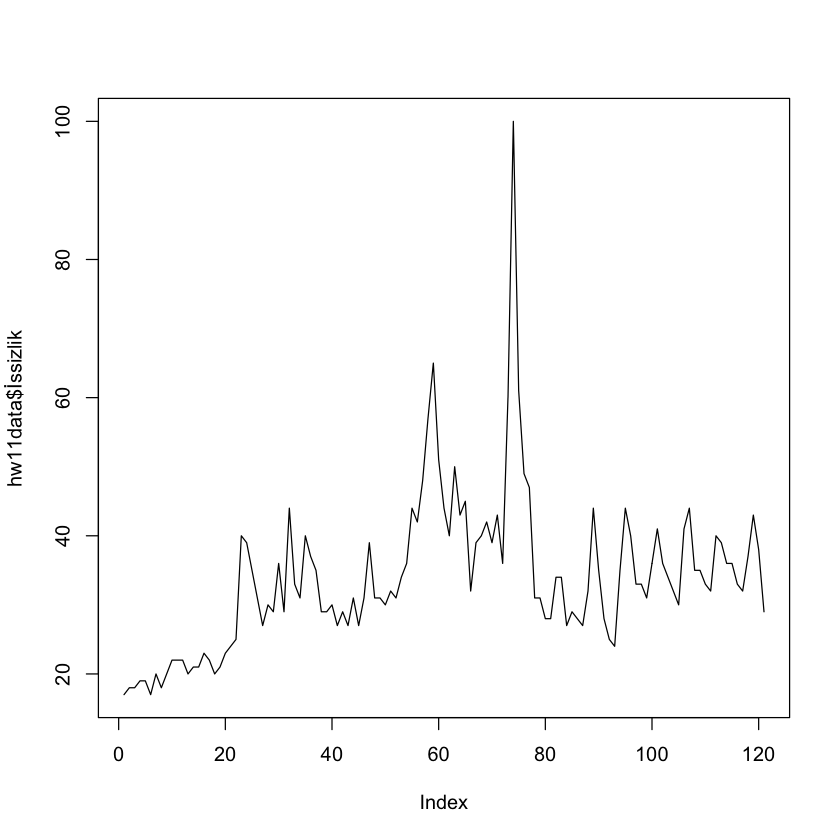

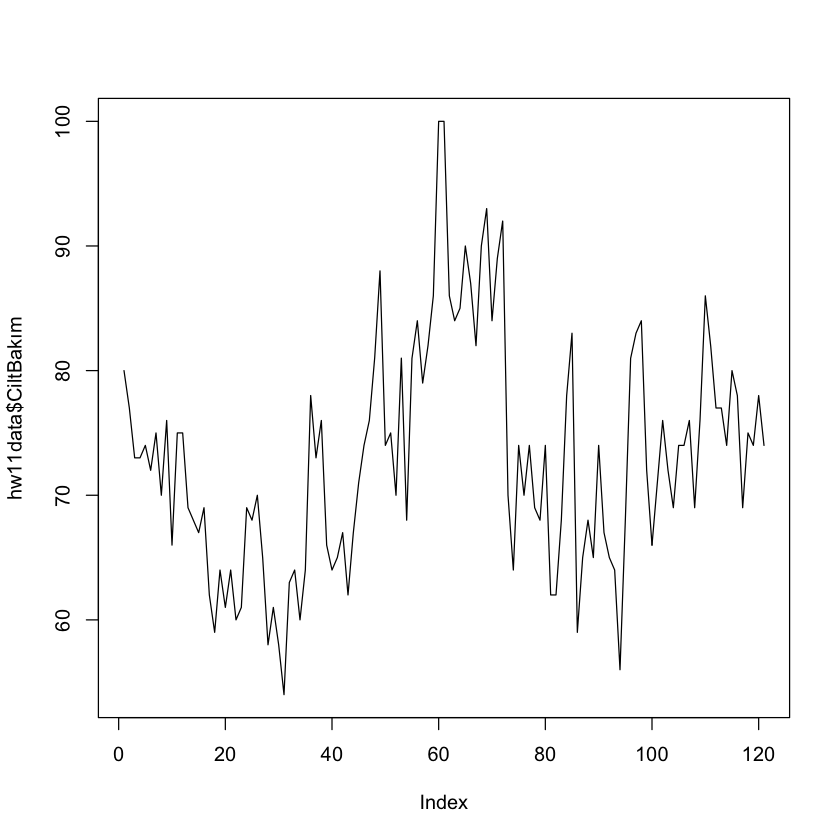

In [156]:
plot(hw11data$Ramazan,type="l")
plot(hw11data$İssizlik,type="l")
plot(hw11data$CiltBakım, type="l")

From the graphs above, we can see that Ramazan has a clear seasonality, İssizlik has a positive linear trend and CiltBakım seems to be close to stationary with no apparent trend or seasonality.

In [114]:
hw11data$Fiyat <- 100*((hw11data$Fiyat -min(hw11data$Fiyat))/(max(hw11data$Fiyat)-min(hw11data$Fiyat)))
summary(hw11data)
head(hw11data)

      Date         Fiyat             Dolar           Sephora      
 2014-03:  1   Min.   :  0.000   Min.   :  1.00   Min.   :  6.00  
 2014-04:  1   1st Qu.:  2.933   1st Qu.:  3.00   1st Qu.: 13.00  
 2014-05:  1   Median : 11.912   Median : 10.00   Median : 23.00  
 2014-06:  1   Mean   : 19.916   Mean   : 11.69   Mean   : 23.88  
 2014-07:  1   3rd Qu.: 21.720   3rd Qu.: 15.00   3rd Qu.: 30.00  
 2014-08:  1   Max.   :100.000   Max.   :100.00   Max.   :100.00  
 (Other):115                                                      
    Ramazan          İssizlik       CiltBakım     
 Min.   :  4.00   Min.   : 17.0   Min.   : 54.00  
 1st Qu.:  6.00   1st Qu.: 28.0   1st Qu.: 66.00  
 Median :  9.00   Median : 32.0   Median : 73.00  
 Mean   : 18.38   Mean   : 33.9   Mean   : 72.96  
 3rd Qu.: 20.00   3rd Qu.: 39.0   3rd Qu.: 78.00  
 Max.   :100.00   Max.   :100.0   Max.   :100.00  
                                                  

Date,Fiyat,Dolar,Sephora,Ramazan,İssizlik,CiltBakım
2014-03,0.0000000,1,7,7,17,80
2014-04,0.1483255,1,6,9,18,77
2014-05,0.3194137,1,7,12,18,73
2014-06,0.4736135,1,7,31,19,73
2014-07,0.5514476,1,7,35,19,74
2014-08,0.6792131,1,7,6,17,72


It is also useful to check our independent variables' scatterplots to detect any type of a pattern such as curvatures beforehand. There doesn't seem to be an exact curvature pattern in any pairs but Fiyat-Sephora pair. This pair will need a transformation to explain the curvature later on. Now, we will proceed to correlation calculation.

Warning message in strwidth(labels, "user"):
“conversion failure on 'İssizlik' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(labels, "user"):
“conversion failure on 'İssizlik' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“conversion failure on 'İssizlik' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“conversion failure on 'İssizlik' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“font metrics unknown for Unicode character U+0130”

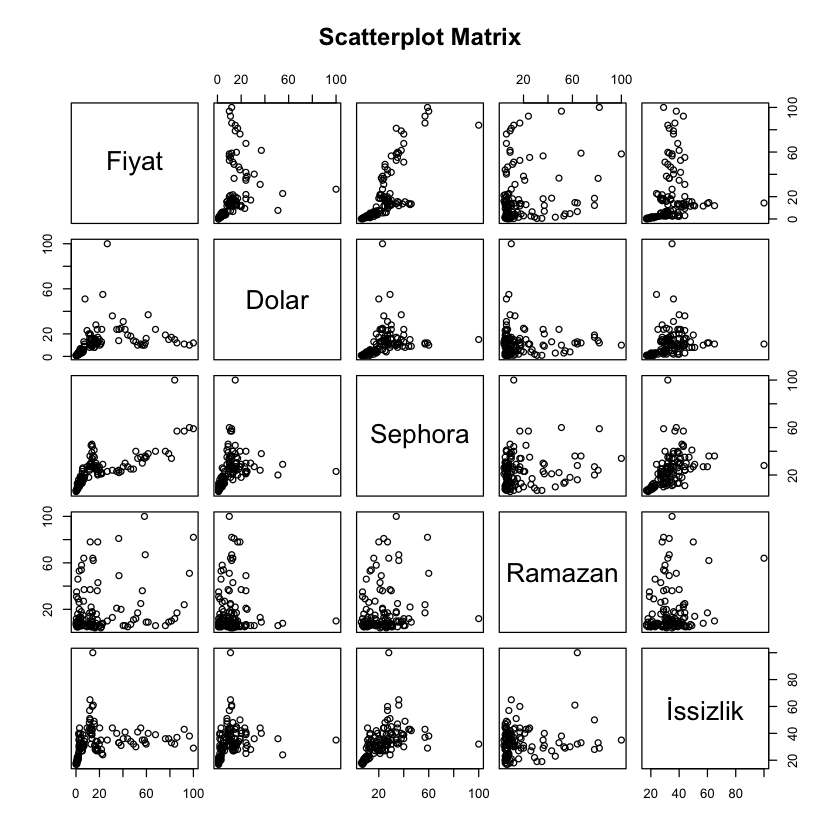

In [45]:
pairs(hw11data[, 2:6], 
      main = "Scatterplot Matrix")


Now, with the newly chosen independent variables, their correlations will be checked. One can see a colored/numbered correlation matrix below.

In [143]:
num.cols2 <- sapply(hw11data, is.numeric)
cor.data2 <- cor(hw11data[,num.cols2])
print(cor.data2)


              Fiyat        Dolar   Sephora      Ramazan  İssizlik  CiltBakım
Fiyat     1.0000000  0.329346173 0.7652083  0.225249744 0.1857805 0.17305213
Dolar     0.3293462  1.000000000 0.2946206 -0.008891708 0.2007231 0.01487221
Sephora   0.7652083  0.294620644 1.0000000  0.136772435 0.4201320 0.33193622
Ramazan   0.2252497 -0.008891708 0.1367724  1.000000000 0.1484542 0.06520440
İssizlik  0.1857805  0.200723060 0.4201320  0.148454204 1.0000000 0.27654518
CiltBakım 0.1730521  0.014872210 0.3319362  0.065204400 0.2765452 1.00000000


Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İssizlik' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İssizlik' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'CiltBakım' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'CiltBakım' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İssizlik' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İssizlik' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'CiltBakım' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failu

$corr
              Fiyat        Dolar   Sephora      Ramazan  İssizlik  CiltBakım
Fiyat     1.0000000  0.329346173 0.7652083  0.225249744 0.1857805 0.17305213
Dolar     0.3293462  1.000000000 0.2946206 -0.008891708 0.2007231 0.01487221
Sephora   0.7652083  0.294620644 1.0000000  0.136772435 0.4201320 0.33193622
Ramazan   0.2252497 -0.008891708 0.1367724  1.000000000 0.1484542 0.06520440
İssizlik  0.1857805  0.200723060 0.4201320  0.148454204 1.0000000 0.27654518
CiltBakım 0.1730521  0.014872210 0.3319362  0.065204400 0.2765452 1.00000000

$corrPos
       xName     yName x y         corr
1      Fiyat     Fiyat 1 6  1.000000000
2      Fiyat     Dolar 1 5  0.329346173
3      Fiyat   Sephora 1 4  0.765208263
4      Fiyat   Ramazan 1 3  0.225249744
5      Fiyat  İssizlik 1 2  0.185780536
6      Fiyat CiltBakım 1 1  0.173052133
7      Dolar     Fiyat 2 6  0.329346173
8      Dolar     Dolar 2 5  1.000000000
9      Dolar   Sephora 2 4  0.294620644
10     Dolar   Ramazan 2 3 -0.008891708
11   

Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İssizlik' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'İssizlik' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'CiltBakım' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newrownames, cex = tl.cex):
“conversion failure on 'CiltBakım' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İssizlik' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'İssizlik' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failure on 'CiltBakım' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(newcolnames, cex = tl.cex):
“conversion failu

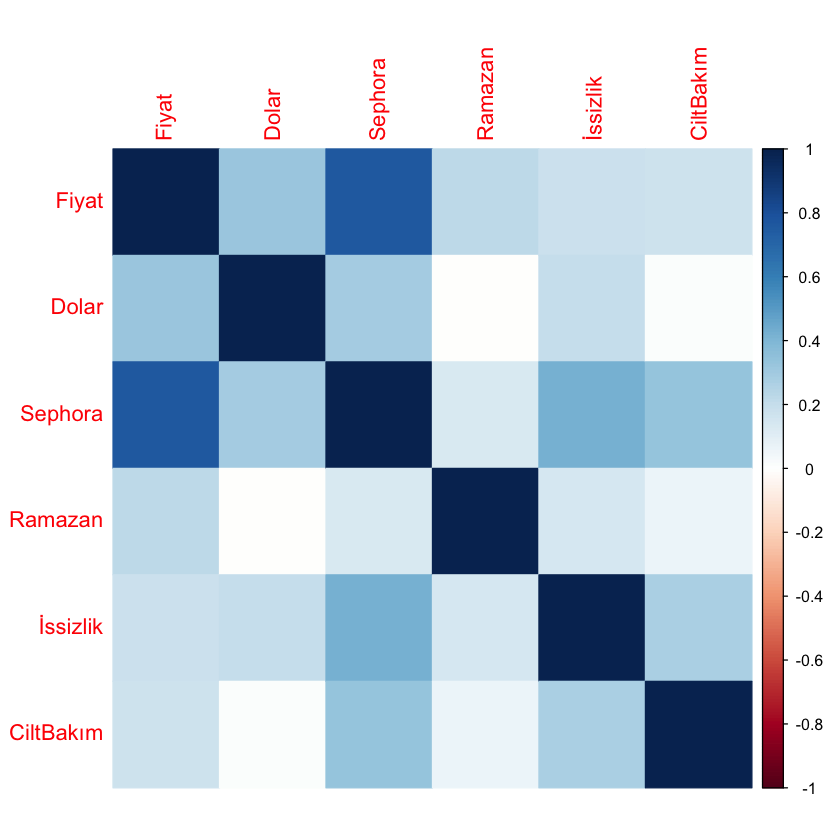

$corr
              Fiyat        Dolar   Sephora      Ramazan  İssizlik  CiltBakım
Fiyat     1.0000000  0.329346173 0.7652083  0.225249744 0.1857805 0.17305213
Dolar     0.3293462  1.000000000 0.2946206 -0.008891708 0.2007231 0.01487221
Sephora   0.7652083  0.294620644 1.0000000  0.136772435 0.4201320 0.33193622
Ramazan   0.2252497 -0.008891708 0.1367724  1.000000000 0.1484542 0.06520440
İssizlik  0.1857805  0.200723060 0.4201320  0.148454204 1.0000000 0.27654518
CiltBakım 0.1730521  0.014872210 0.3319362  0.065204400 0.2765452 1.00000000

$corrPos
       xName     yName x y         corr
1      Fiyat     Fiyat 1 6  1.000000000
2      Fiyat     Dolar 1 5  0.329346173
3      Fiyat   Sephora 1 4  0.765208263
4      Fiyat   Ramazan 1 3  0.225249744
5      Fiyat  İssizlik 1 2  0.185780536
6      Fiyat CiltBakım 1 1  0.173052133
7      Dolar     Fiyat 2 6  0.329346173
8      Dolar     Dolar 2 5  1.000000000
9      Dolar   Sephora 2 4  0.294620644
10     Dolar   Ramazan 2 3 -0.008891708
11   

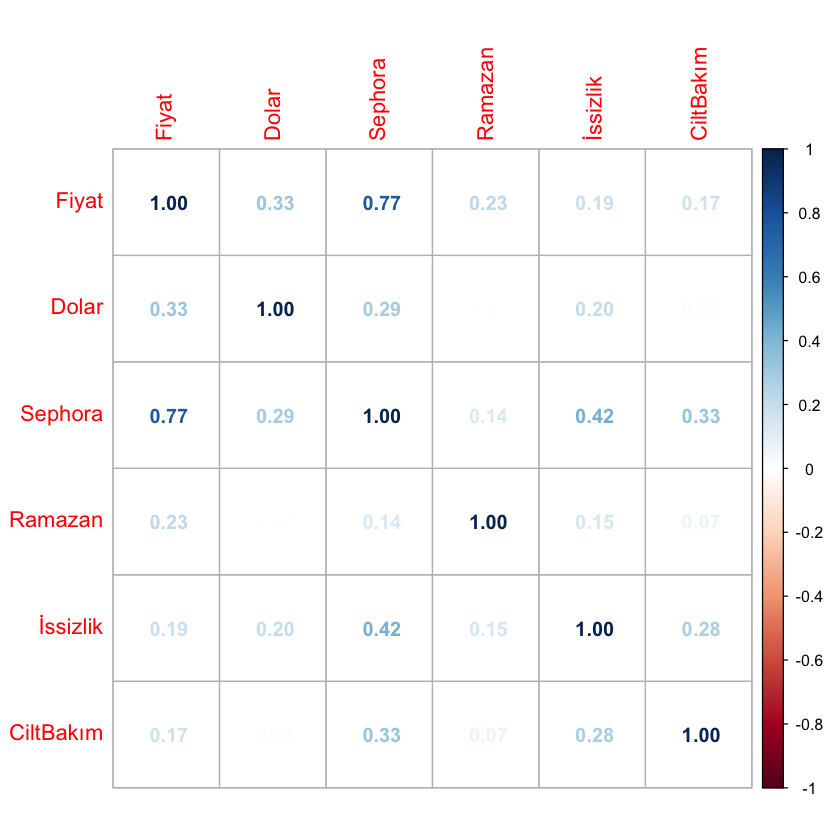

In [118]:
library(corrplot)
print(corrplot(cor.data2,method="color", tl.cex = 1.1, cl.cex=0.8))
print(corrplot(cor.data2,method="number", tl.cex = 1.1, cl.cex=0.8))

It can be clearly seen that all independent variable pairs have correlations less than 0.5 which means that our current set for variables will be continued for the rest of the assignment. Let's fit our first model that does not contain any modifications on our independent and dependent variables.


Call:
lm(formula = Fiyat ~ Dolar + CiltBakım + İssizlik + Sephora, 
    data = hw11data)

Residuals:
    Min      1Q  Median      3Q     Max 
-47.593  -7.990  -1.255   3.005  45.916 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.4095    11.3916   0.475  0.63577    
Dolar         0.2383     0.1164   2.048  0.04281 *  
CiltBakım    -0.1425     0.1628  -0.875  0.38329    
İssizlik     -0.3625     0.1382  -2.623  0.00988 ** 
Sephora       1.4411     0.1179  12.223  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.1 on 116 degrees of freedom
Multiple R-squared:  0.6254,	Adjusted R-squared:  0.6125 
F-statistic: 48.41 on 4 and 116 DF,  p-value: < 2.2e-16


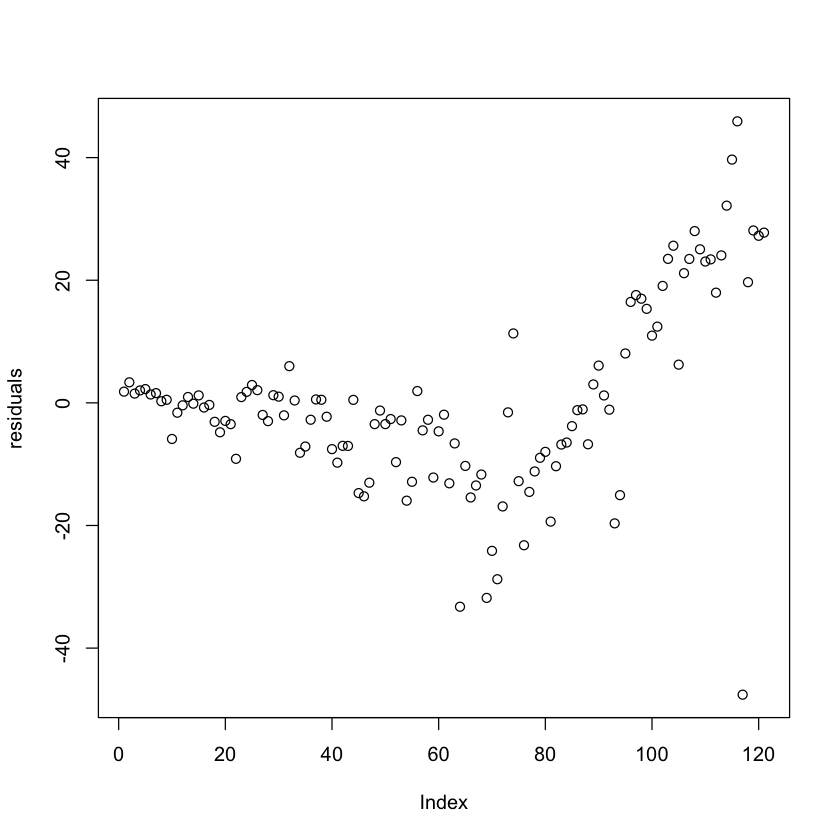

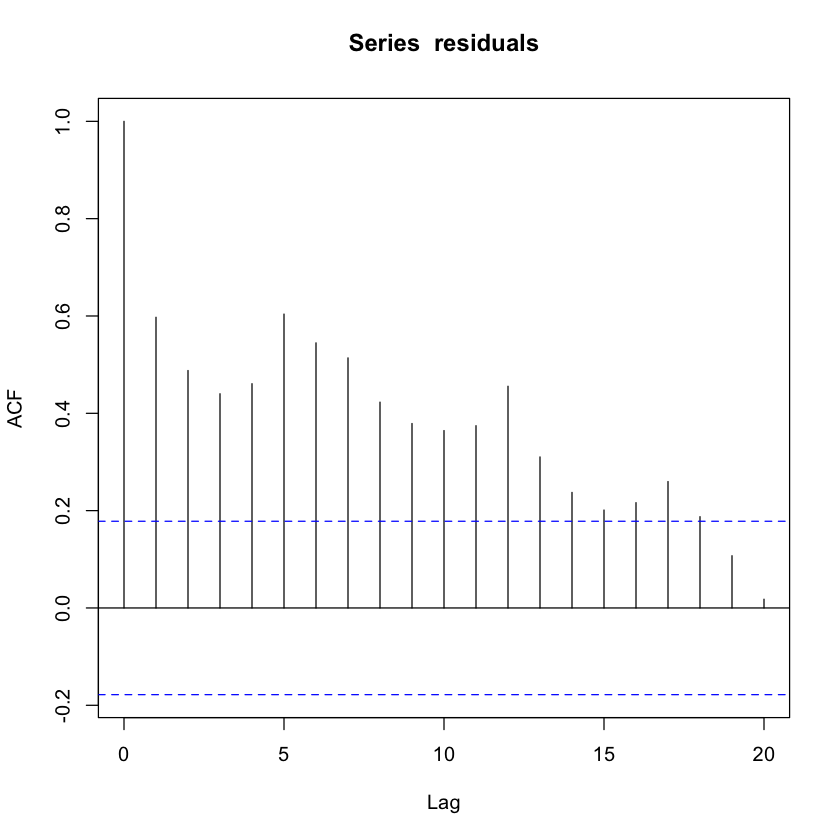

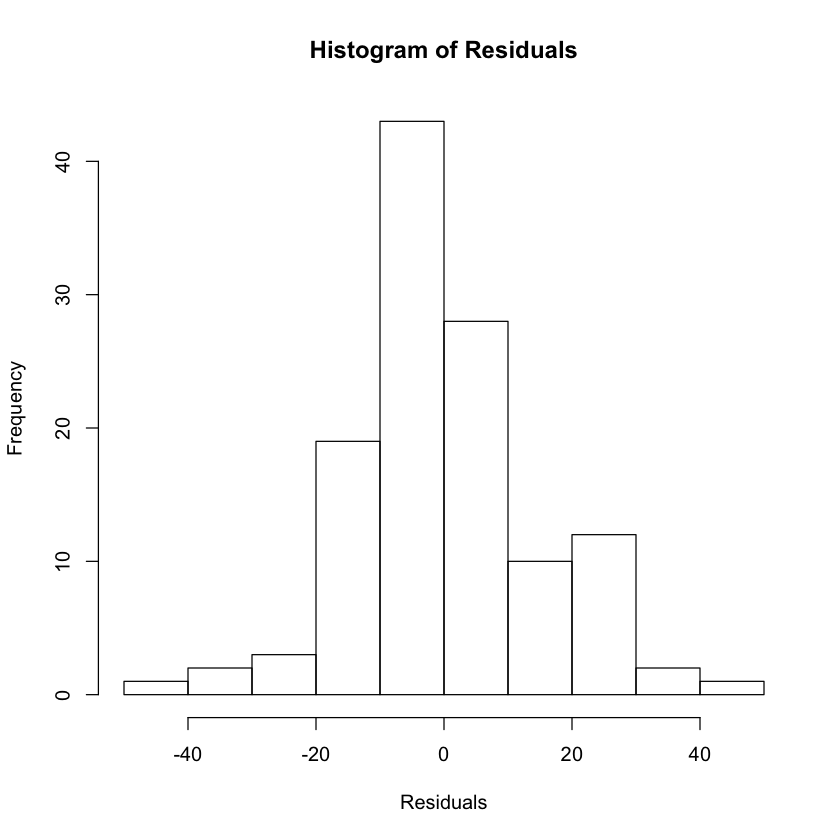

In [119]:
model_2 <- lm(Fiyat ~ Dolar+CiltBakım+İssizlik+Sephora, data=hw11data)
summary(model_2)
residuals <- residuals(model_2)
plot(residuals)
acf(residuals)
hist(residuals, main = "Histogram of Residuals", xlab = "Residuals")

First warning of our model's lack of validity is a relatively low value of R squared which is 0.6125 . Due to F statistics' low p value, we can conclude that our model is significant compared to a model with no slopes. And once t values are checked, we can see that Dolar, İssizlik and Sephora has a significant effect on Fiyat. Now, we will analyze the model's residuals. In the ACF plot it can be seen with the large correlation values that our model is not stationary yet and has some trend or seasonality that has not been explained. Let's see residual plots for each independent variable and try to detect which one is causing the curvature in residual plot. 

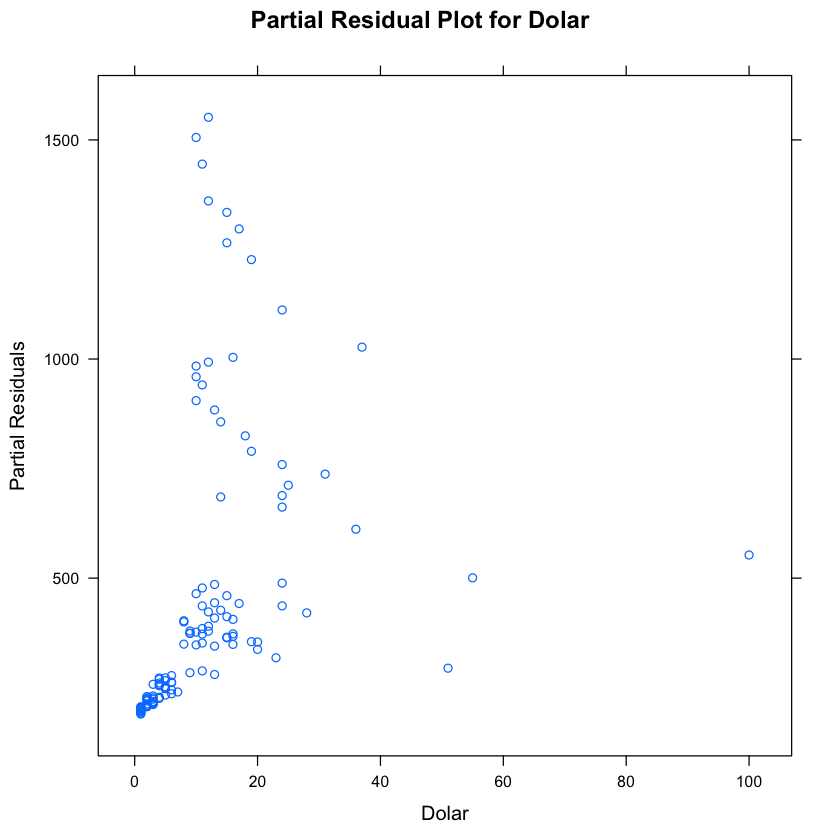

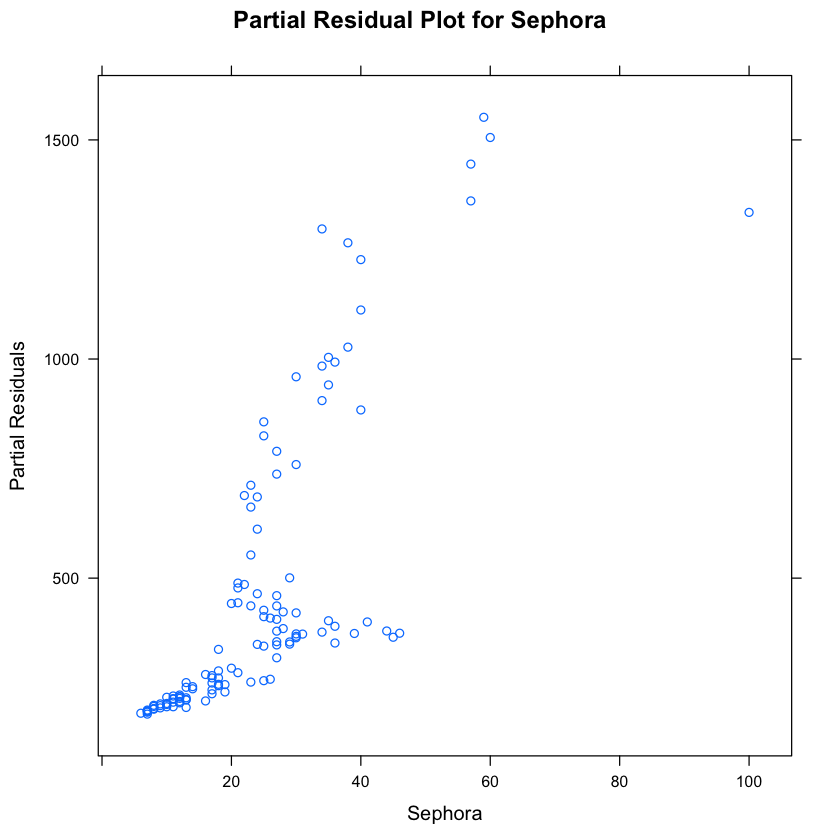

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Partial Residual Plot for CiltBakım' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Partial Residual Plot for CiltBakım' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'CiltBakım' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'CiltBakım' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Partial Residual Plot for CiltBakım' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Partial Residual Plot

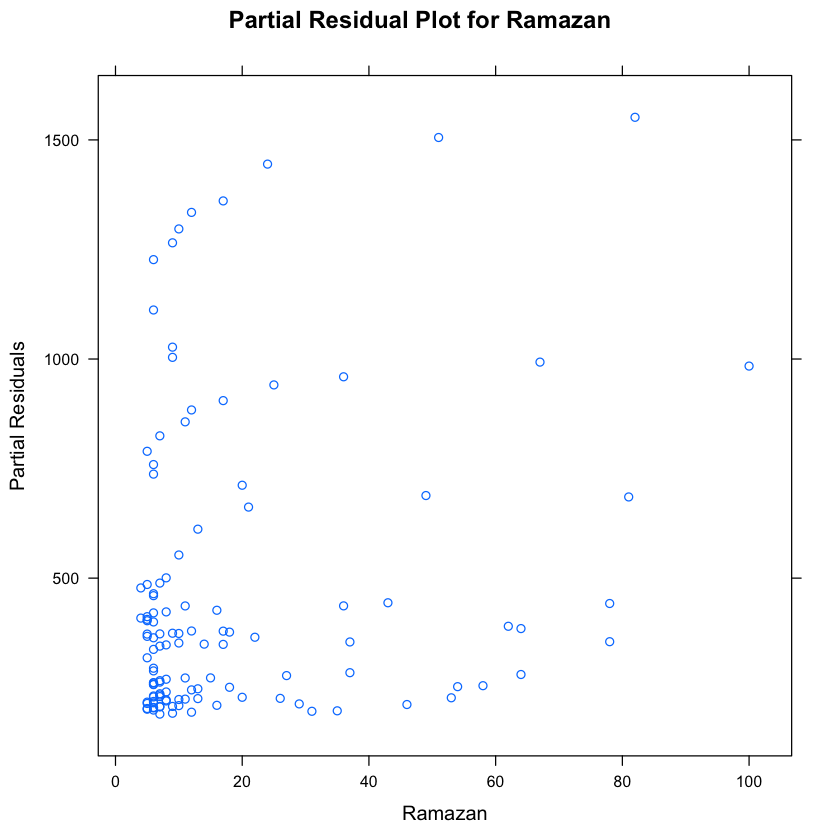

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Partial Residual Plot for İssizlik' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Partial Residual Plot for İssizlik' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'İssizlik' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'İssizlik' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Partial Residual Plot for İssizlik' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Partial Residual Plot for 

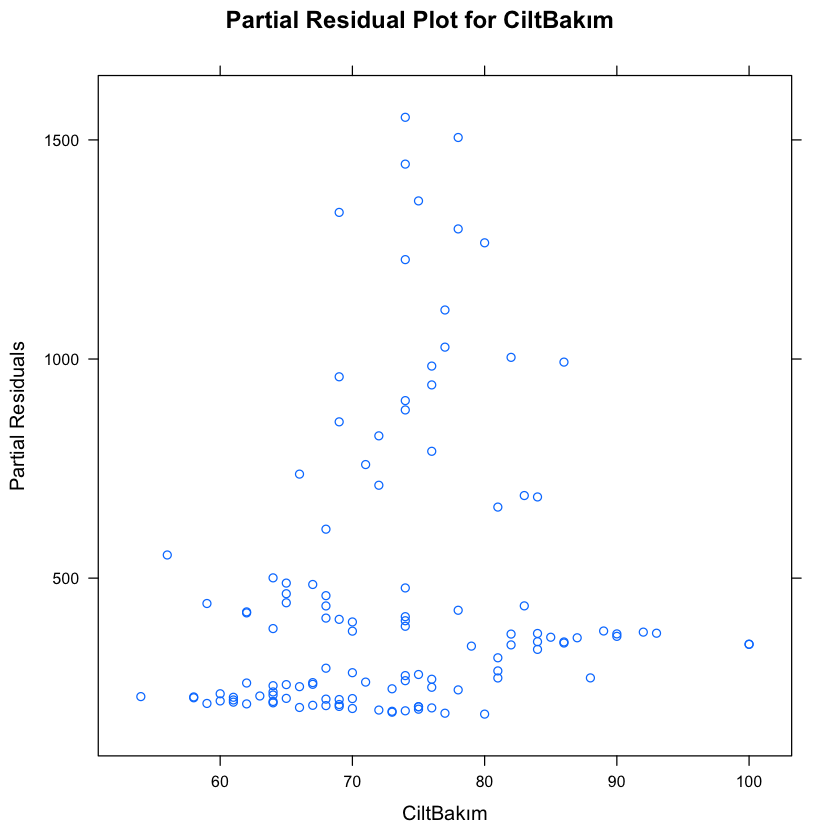

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


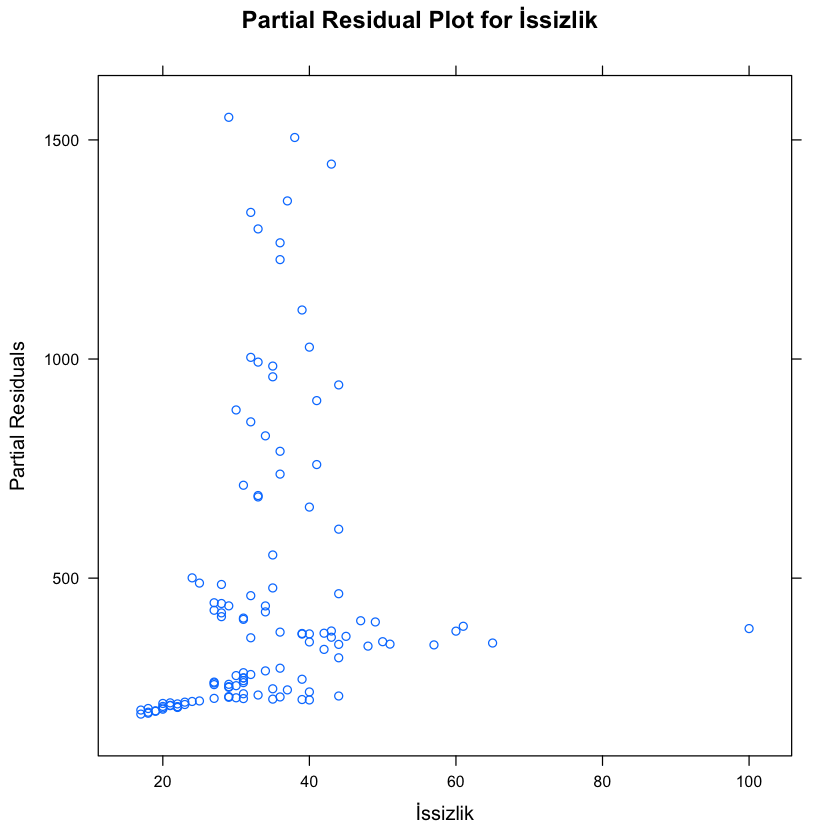

In [122]:
library(lattice)

xyplot(partial_resid ~ Dolar, data = hw11data, 
       xlab = "Dolar", ylab = "Partial Residuals",
       main = "Partial Residual Plot for Dolar")
xyplot(partial_resid ~ Sephora, data = hw11data, 
       xlab = "Sephora", ylab = "Partial Residuals",
       main = "Partial Residual Plot for Sephora")
xyplot(partial_resid ~ Ramazan, data = hw11data, 
       xlab = "Ramazan", ylab = "Partial Residuals",
       main = "Partial Residual Plot for Ramazan")
xyplot(partial_resid ~ CiltBakım, data = hw11data, 
       xlab = "CiltBakım", ylab = "Partial Residuals",
       main = "Partial Residual Plot for CiltBakım")
xyplot(partial_resid ~ İssizlik, data = hw11data, 
       xlab = "İssizlik", ylab = "Partial Residuals",
       main = "Partial Residual Plot for İssizlik")


The residuals seem to be randomly scattered along the axis for CiltBakım and Ramazan. Which is a sign that they are not the variables causing the non linearity. The residuals seem to have a curvature for Dolar,Sephora and İssizlik variables. This curvature indicates that our model should be modified for an existing non linear relationship. Let's check ACF of Dolar,Sephora and İssizlik to see if there's any seasonality as well.

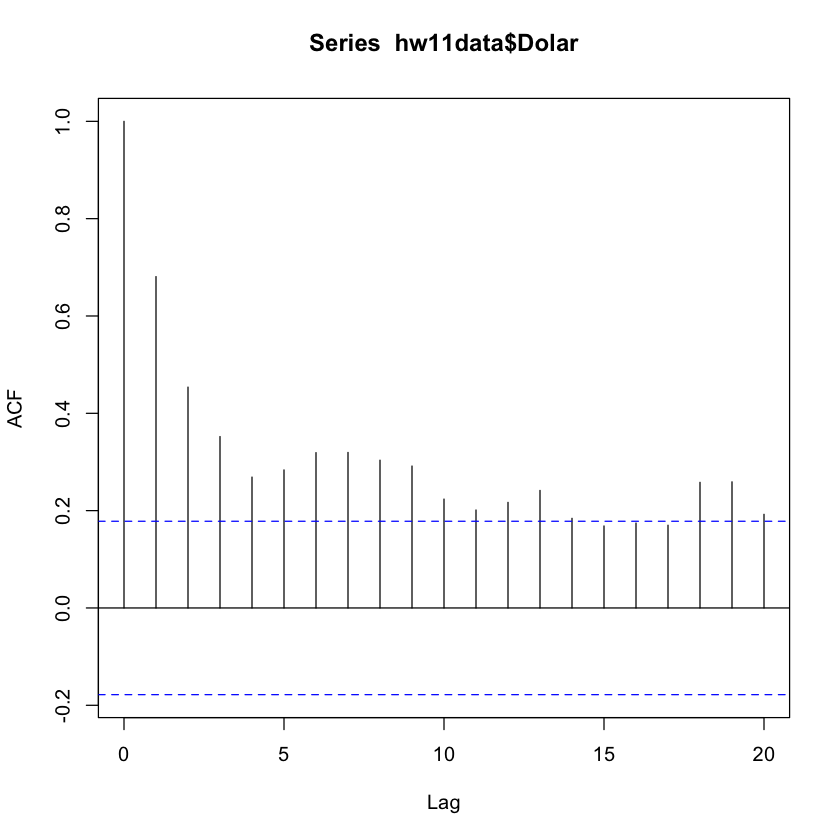

Warning message in title(if (!is.null(main)) main else if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'Series  hw11data$İssizlik' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in title(if (!is.null(main)) main else if (i == j) snames[i] else paste(sn.abbr[i], :
“conversion failure on 'Series  hw11data$İssizlik' in 'mbcsToSbcs': dot substituted for <b0>”

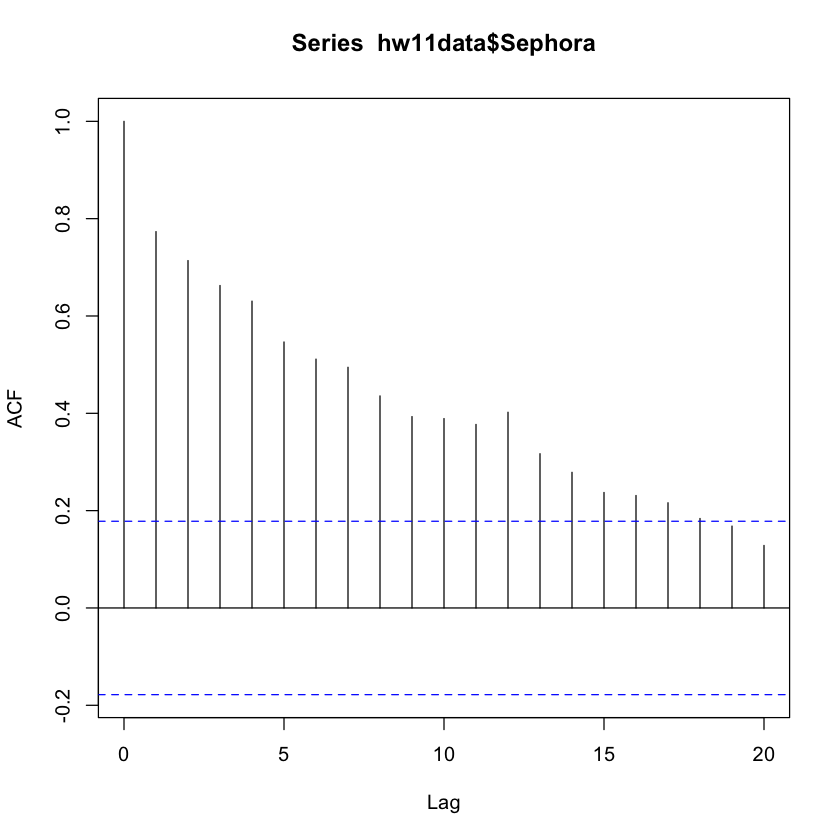

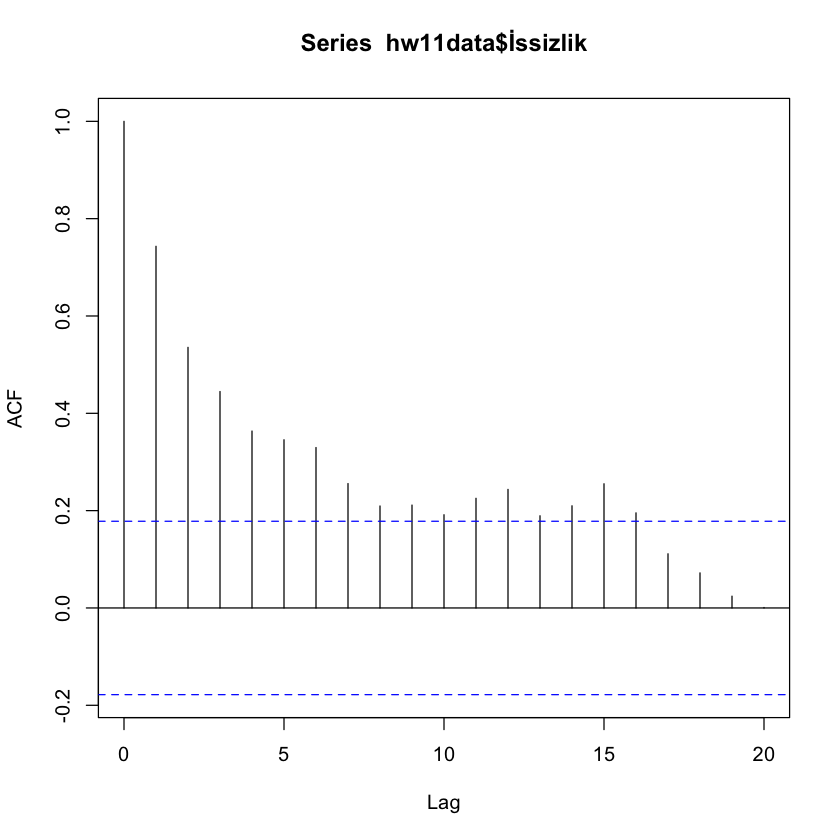

In [123]:
acf(hw11data$Dolar)
acf(hw11data$Sephora)
acf(hw11data$İssizlik)


It can be clearly seen that the Sephora variable has the most repeating significant autocorrelation values. While Dolar and İssizlik do have significant spikes at the start, these spikes reduce as the lag gets larger. So, our first modification will be for Sephora variable.

In [126]:
# Modifying "Sephora" to make it stationary, we will use log transformation
hw11data_copy1$sepho <- log(hw11data_copy1$Sephora)
model_2_1 <- lm(Fiyat ~ Dolar+İssizlik+Ramazan+CiltBakım+sepho, data=hw11data_copy1)
summary(model_2_1)


Call:
lm(formula = Fiyat ~ Dolar + İssizlik + Ramazan + CiltBakım + 
    sepho, data = hw11data_copy1)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.135 -11.610  -0.959   9.335  43.919 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -61.25478   12.12307  -5.053 1.66e-06 ***
Dolar         0.06356    0.12731   0.499   0.6185    
İssizlik     -0.65997    0.15426  -4.278 3.92e-05 ***
Ramazan       0.18217    0.07150   2.548   0.0122 *  
CiltBakım    -0.20222    0.17111  -1.182   0.2397    
sepho        37.79591    3.46180  10.918  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.66 on 115 degrees of freedom
Multiple R-squared:  0.6005,	Adjusted R-squared:  0.5832 
F-statistic: 34.57 on 5 and 115 DF,  p-value: < 2.2e-16


The R squared value did not increase that much, we will try to extract the mean from Sephora variable to ensure heteroscedasticity will be reduced to minimum.

In [127]:
hw11data_copy1$sepho <- log(hw11data_copy1$Sephora)
mean <- mean(hw11data_copy1$Sephora)
dif <- c(mean, hw11data_copy1$Sephora[1:120])
model_2_1 <- lm(Fiyat ~ Dolar+İssizlik+Ramazan+CiltBakım+sepho+dif, data=hw11data_copy1)
summary(model_2_1)


Call:
lm(formula = Fiyat ~ Dolar + İssizlik + Ramazan + CiltBakım + 
    sepho + dif, data = hw11data_copy1)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.882 -10.756  -1.099   9.682  40.337 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -21.37188   13.22099  -1.617  0.10875    
Dolar         0.10717    0.11471   0.934  0.35215    
İssizlik     -0.60325    0.13906  -4.338 3.12e-05 ***
Ramazan       0.17938    0.06426   2.791  0.00616 ** 
CiltBakım    -0.34351    0.15606  -2.201  0.02974 *  
sepho        20.19502    4.53892   4.449 2.02e-05 ***
dif           0.90006    0.16899   5.326 5.11e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.08 on 114 degrees of freedom
Multiple R-squared:  0.6801,	Adjusted R-squared:  0.6633 
F-statistic:  40.4 on 6 and 114 DF,  p-value: < 2.2e-16


This is a better improvement compared to just taking Sephora's logarithm, but R squared did not improve greatly. Now, we will try to add the trend to our model. 

In [144]:
hw11data_copy2 <- data.frame(hw11data)
hw11data_copy2$sepho <- log(hw11data_copy2$Sephora)
mean <- mean(hw11data_copy2$Sephora)
dif <- c(mean, hw11data_copy2$Sephora[1:120])

hw11data_copy2$trend <- 1:121
model_trend <- lm(Fiyat ~ sepho+dif+Dolar+Ramazan+İssizlik+CiltBakım+trend, data=hw11data_copy2)
summary(model_trend)


Call:
lm(formula = Fiyat ~ sepho + dif + Dolar + Ramazan + İssizlik + 
    CiltBakım + trend, data = hw11data_copy2)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.376  -5.992   1.264   6.094  33.906 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.61105   11.25299   1.298 0.196789    
sepho       -6.12340    4.74802  -1.290 0.199797    
dif          0.62587    0.13699   4.569 1.26e-05 ***
Dolar       -0.26838    0.10074  -2.664 0.008846 ** 
Ramazan      0.06905    0.05227   1.321 0.189152    
İssizlik    -0.41139    0.11183  -3.679 0.000361 ***
CiltBakım   -0.15716    0.12486  -1.259 0.210719    
trend        0.59552    0.07073   8.419 1.34e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.08 on 113 degrees of freedom
Multiple R-squared:  0.8034,	Adjusted R-squared:  0.7912 
F-statistic: 65.98 on 7 and 113 DF,  p-value: < 2.2e-16


Significant improvement when trend is included in our model compared to the last try. Let's check our residuals.

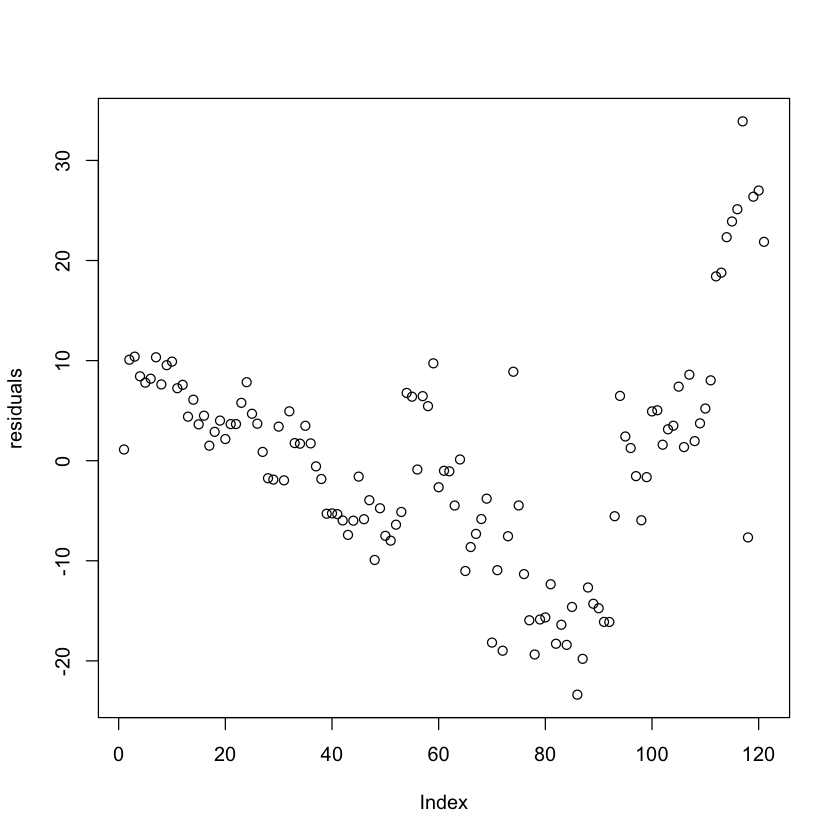

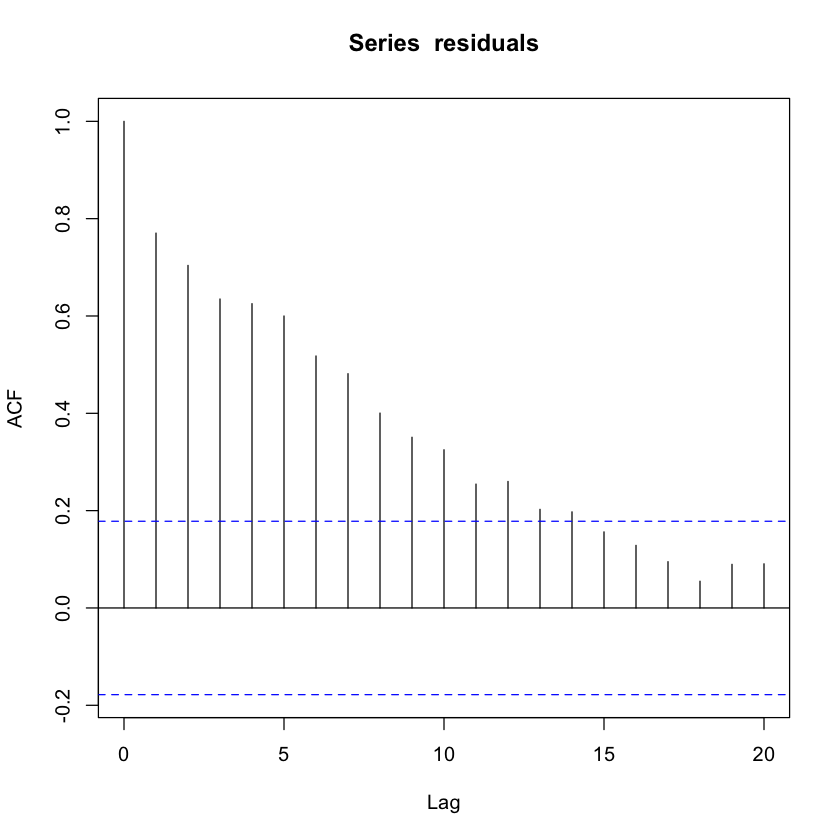

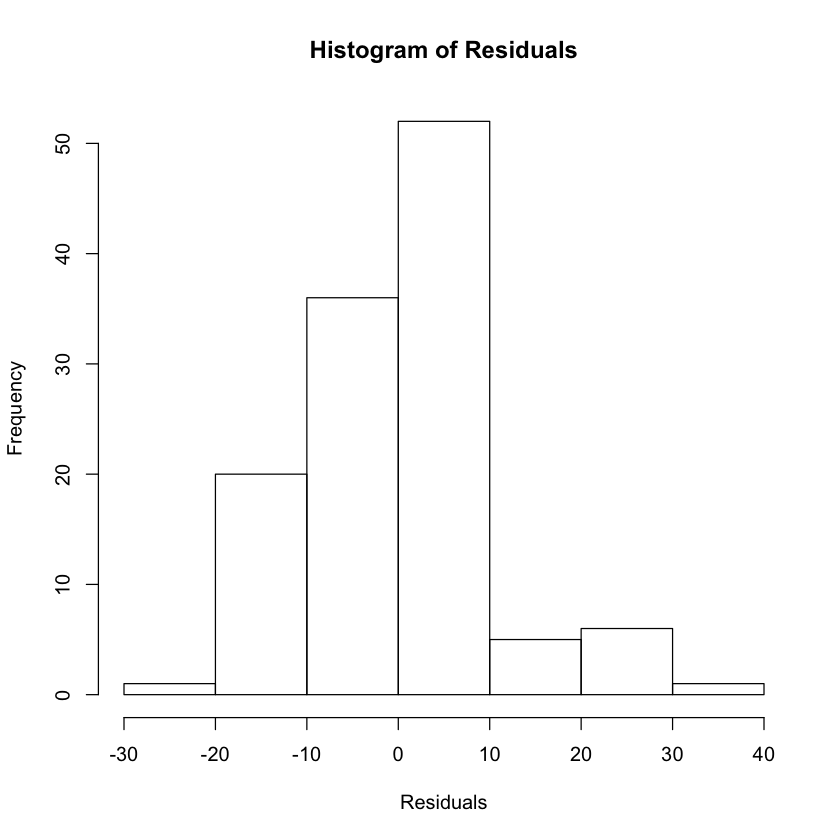

In [131]:
residuals <- residuals(model_trend)
plot(residuals)
acf(residuals)
hist(residuals, main = "Histogram of Residuals", xlab = "Residuals")

Our residuals still have some curvature to them, to explain the non-linear relationship further we shall transform our dependent variable with taking its logarithm.


Call:
lm(formula = log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + Ramazan + 
    İssizlik + CiltBakım + trend, data = hw1_copy2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38380 -0.07178  0.04057  0.08122  0.23338 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.0922724  0.1261662  -0.731   0.4661    
dif           0.0007937  0.0015359   0.517   0.6063    
log(Sephora)  0.1251080  0.0532338   2.350   0.0205 *  
Dolar        -0.0016192  0.0011294  -1.434   0.1544    
Ramazan       0.0003174  0.0005860   0.542   0.5892    
İssizlik      0.0007209  0.0012539   0.575   0.5665    
CiltBakım     0.0021150  0.0013999   1.511   0.1336    
trend         0.0316119  0.0007930  39.862   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1243 on 113 degrees of freedom
Multiple R-squared:  0.9896,	Adjusted R-squared:  0.989 
F-statistic:  1539 on 7 and 113 DF,  p-value: < 2.2e-16


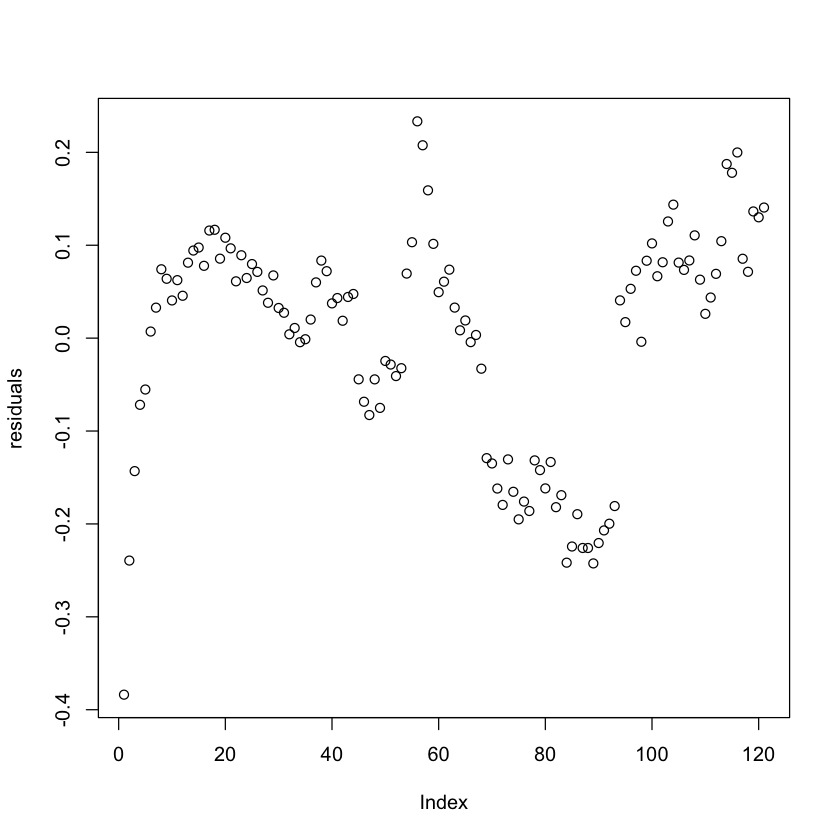

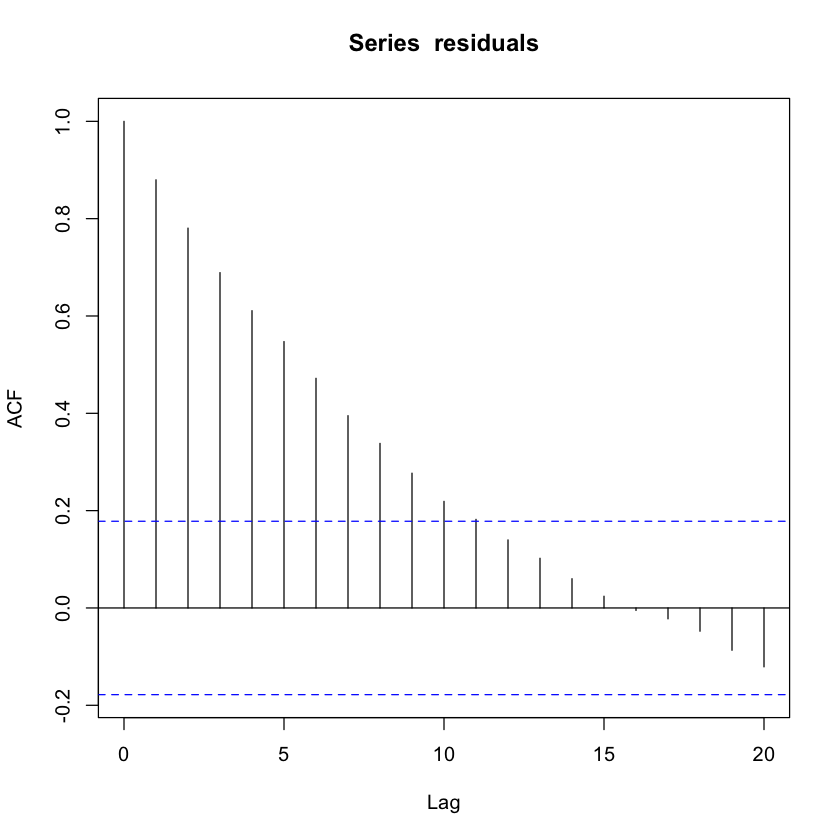

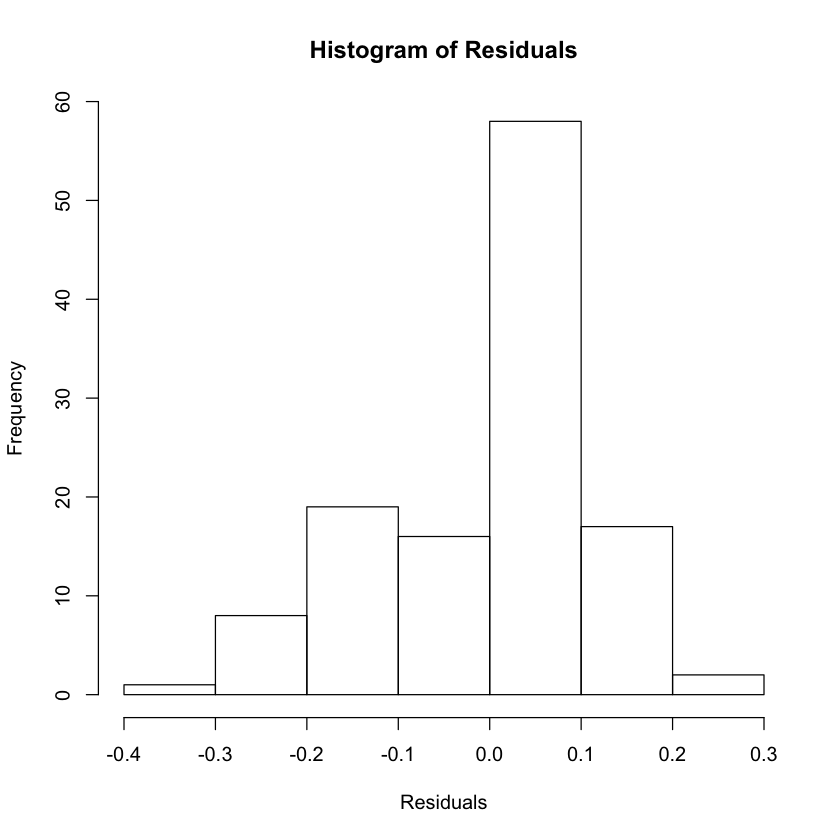

In [133]:
mean <- mean(hw11data_copy1$Sephora)
dif <- c(mean, hw11data_copy1$Sephora[1:120])
hw1_copy2$trend <- 1:121
model_new <- lm(log(Fiyat+1) ~ dif+log(Sephora)+Dolar+Ramazan+İssizlik+CiltBakım+trend, data=hw1_copy2)
summary(model_new)
residuals <- residuals(model_new)
plot(residuals)
acf(residuals)
hist(residuals, main = "Histogram of Residuals", xlab = "Residuals")

Our R squared value has improved a lot, now it's 0.989 . Trend is the most significant coefficient due to its very high t-test value, log(Sephora) is the second most significant coefficient for this model. But the model's residuals seem to have a pattern which indicates our model is not valid to explain the dependent variable yet. Below there are tables regarding the pattern our residuals have with this model. It can be clearly seen that residuals do not form a perfect x=y line when put in the QQ plot.

Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + Ramazan + İssizlik + CiltB ...' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + Ramazan + İssizlik + CiltB ...' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + Ramazan + İssizlik + CiltB ...' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + Ramazan + İssizlik + CiltB ...' in 'mbcsToSbcs': dot substituted for <b0>”

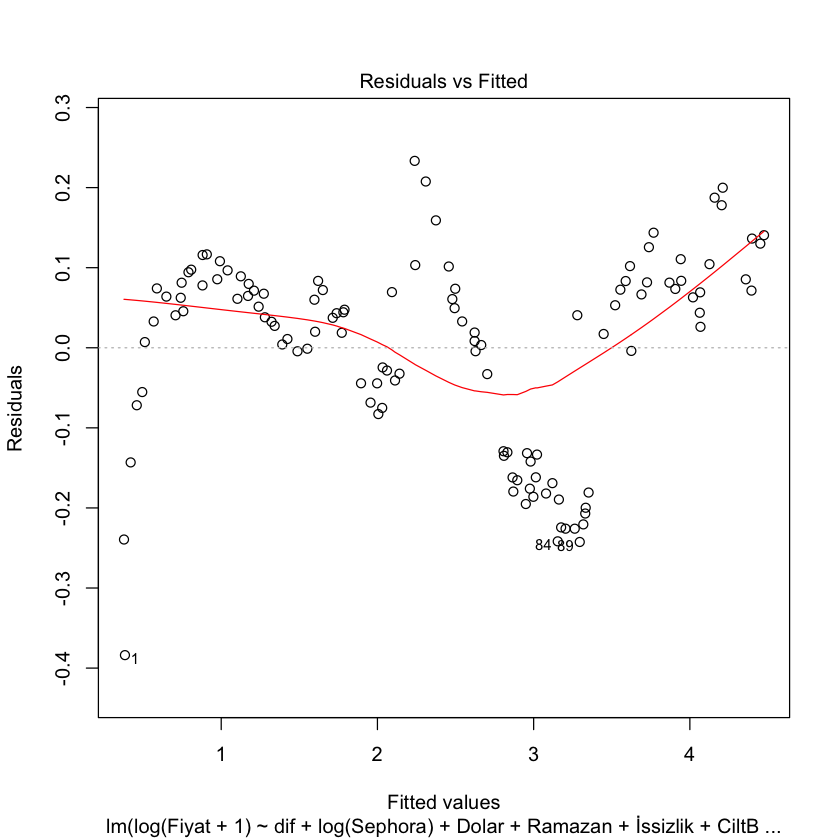

Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + Ramazan + İssizlik + CiltB ...' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + Ramazan + İssizlik + CiltB ...' in 'mbcsToSbcs': dot substituted for <b0>”

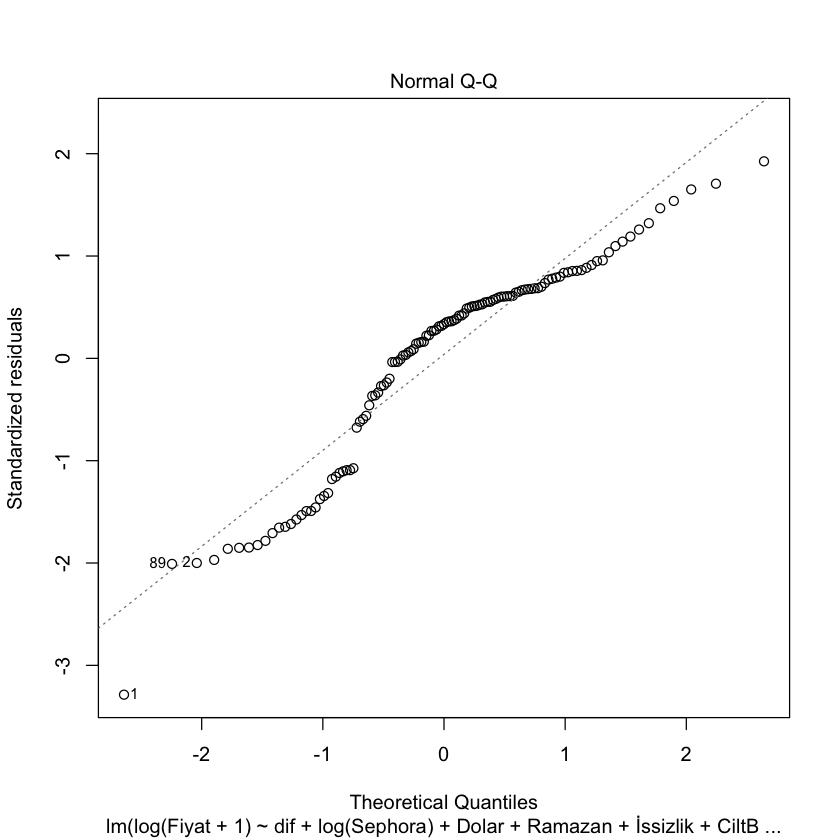

Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + Ramazan + İssizlik + CiltB ...' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + Ramazan + İssizlik + CiltB ...' in 'mbcsToSbcs': dot substituted for <b0>”

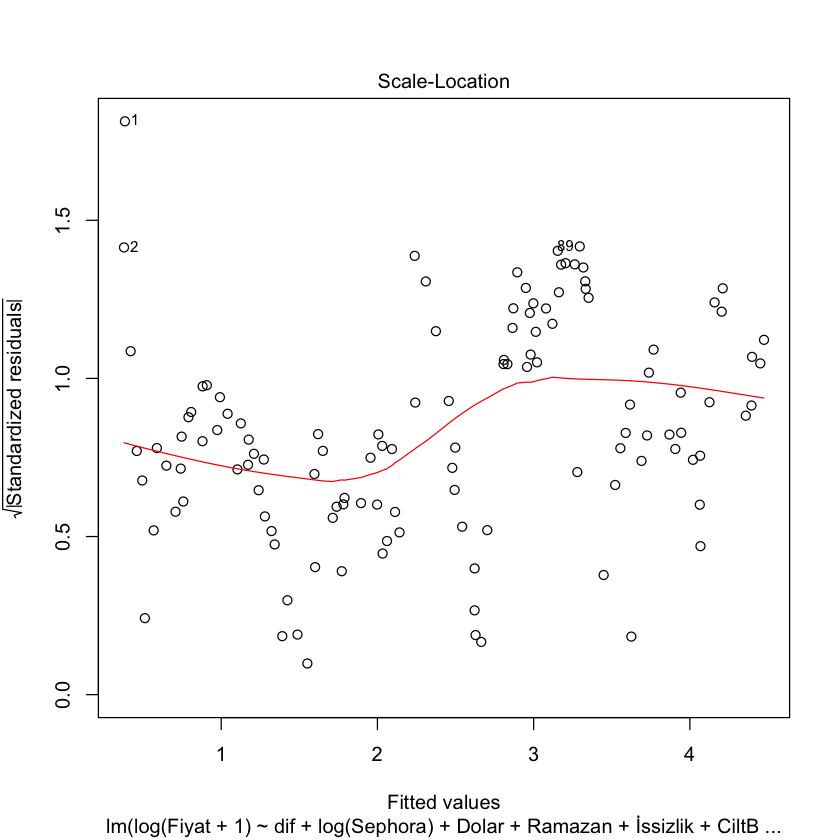

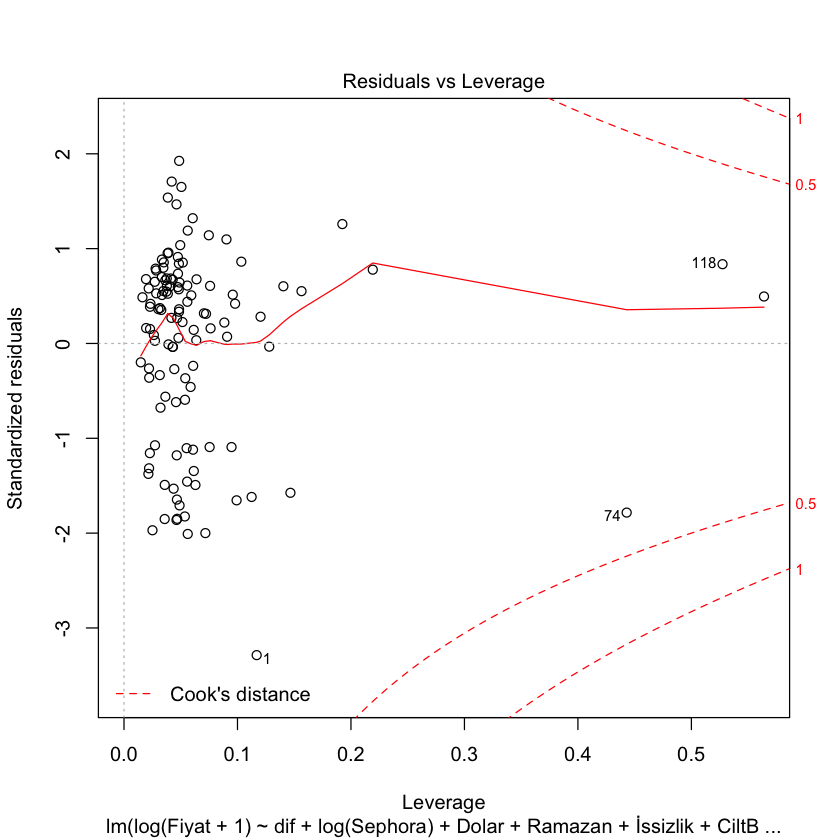

In [134]:
plot(model_new)

Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + dif_2 + sqrt(Sephora) + sqrt(Dolar) + Ramazan + İ ...' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + dif_2 + sqrt(Sephora) + sqrt(Dolar) + Ramazan + İ ...' in 'mbcsToSbcs': dot substituted for <b0>”

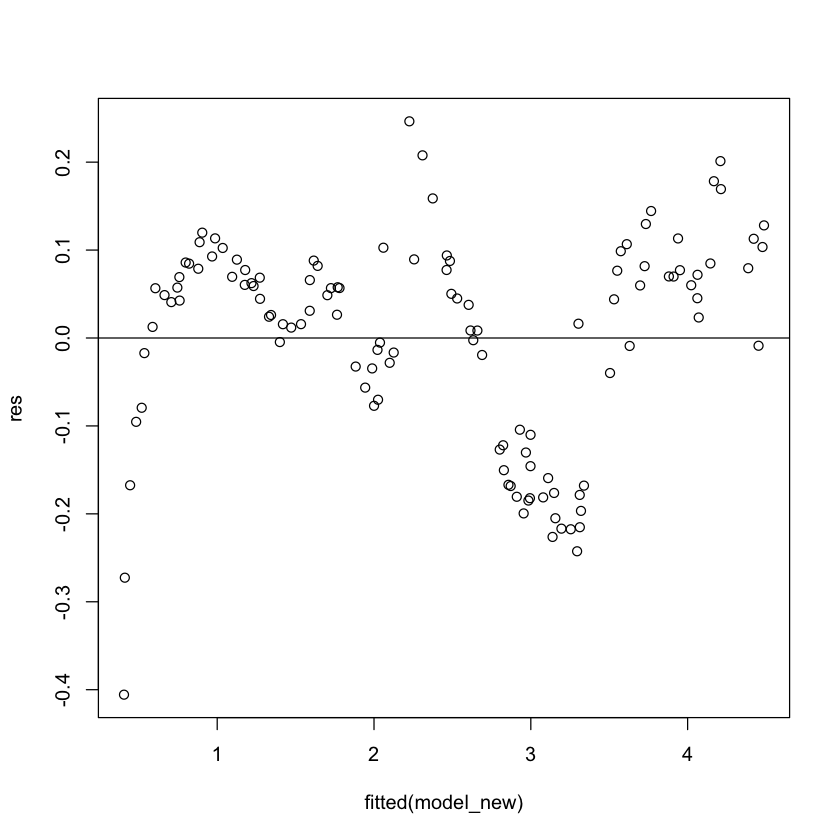

Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + dif_2 + sqrt(Sephora) + sqrt(Dolar) + Ramazan + İ ...' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + dif_2 + sqrt(Sephora) + sqrt(Dolar) + Ramazan + İ ...' in 'mbcsToSbcs': dot substituted for <b0>”

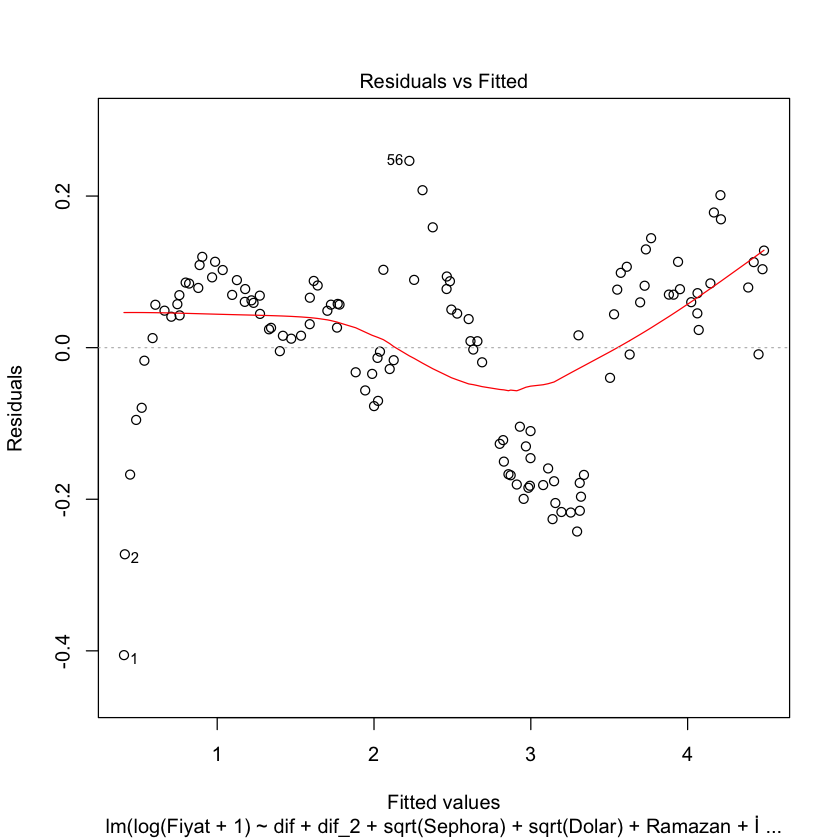

Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + dif_2 + sqrt(Sephora) + sqrt(Dolar) + Ramazan + İ ...' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + dif_2 + sqrt(Sephora) + sqrt(Dolar) + Ramazan + İ ...' in 'mbcsToSbcs': dot substituted for <b0>”

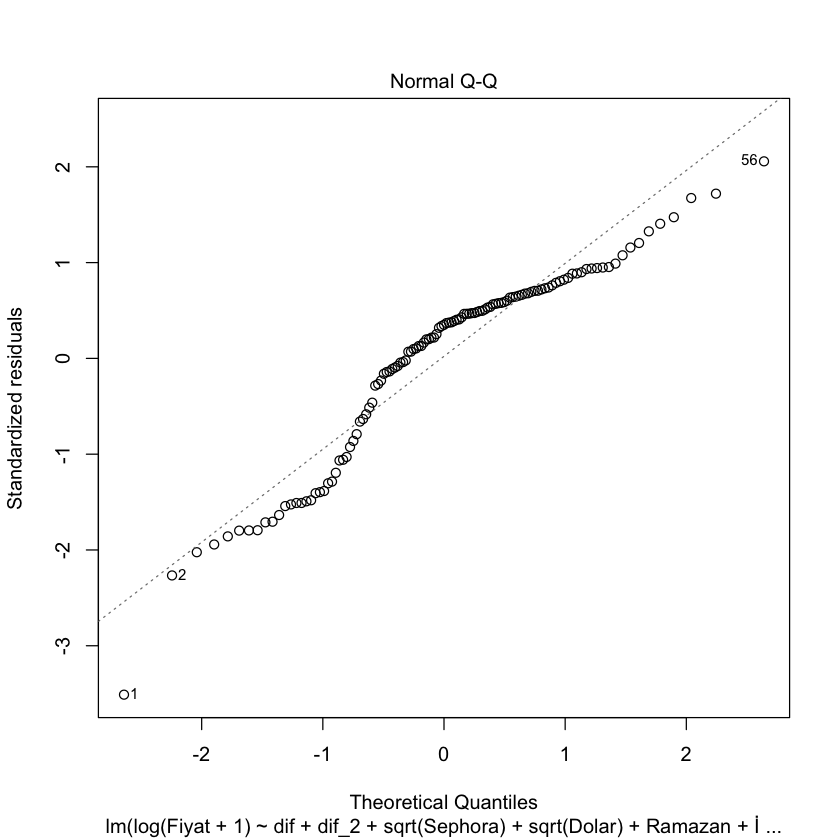

Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + dif_2 + sqrt(Sephora) + sqrt(Dolar) + Ramazan + İ ...' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + dif_2 + sqrt(Sephora) + sqrt(Dolar) + Ramazan + İ ...' in 'mbcsToSbcs': dot substituted for <b0>”

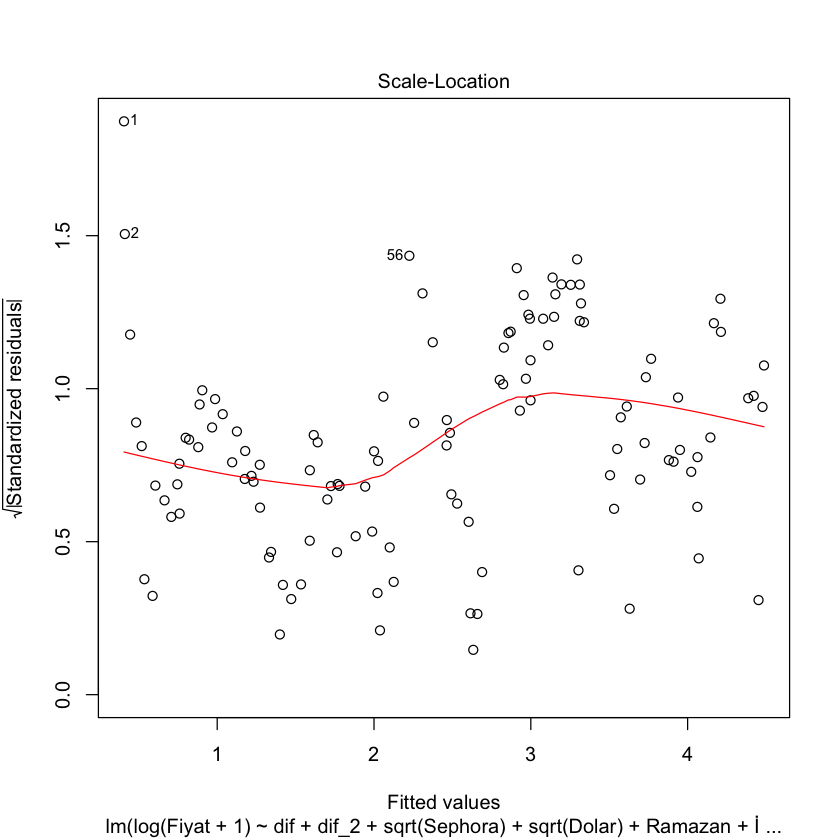

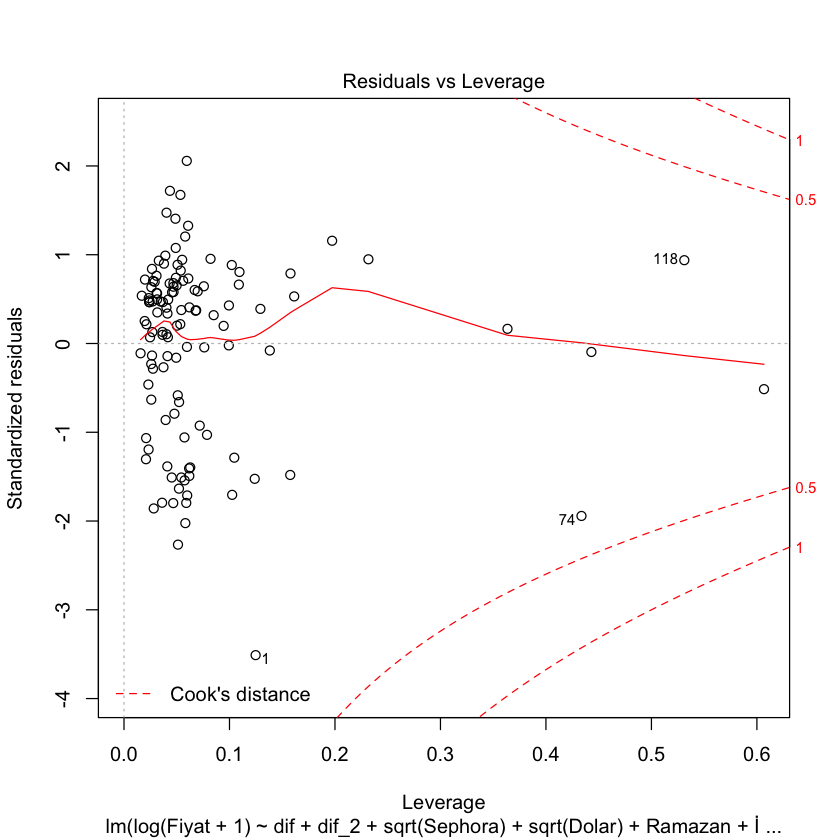

In [145]:
res <- resid(model_new)
plot(fitted(model_new), res)
abline(0,0)
plot(model_new)

Lastly, we will model seasonality with dummy variables for Ramazan variable. 


Call:
lm(formula = log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + İssizlik + 
    CiltBakım + trend + ramazan_dummies, data = hw1_copy2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32896 -0.03656  0.00000  0.06710  0.21555 

Coefficients: (1 not defined because of singularities)
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                             -0.0311183  0.2146015  -0.145    0.885
dif                                     -0.0015498  0.0021092  -0.735    0.465
log(Sephora)                             0.1193137  0.0740598   1.611    0.111
Dolar                                   -0.0020203  0.0013243  -1.526    0.131
İssizlik                                 0.0016189  0.0017246   0.939    0.351
CiltBakım                                0.0026893  0.0019433   1.384    0.171
trend                                    0.0321001  0.0010934  29.358   <2e-16
ramazan_dummiesfactor(ramazan_month)4   -0.2700212  0.1644941  -1.642  

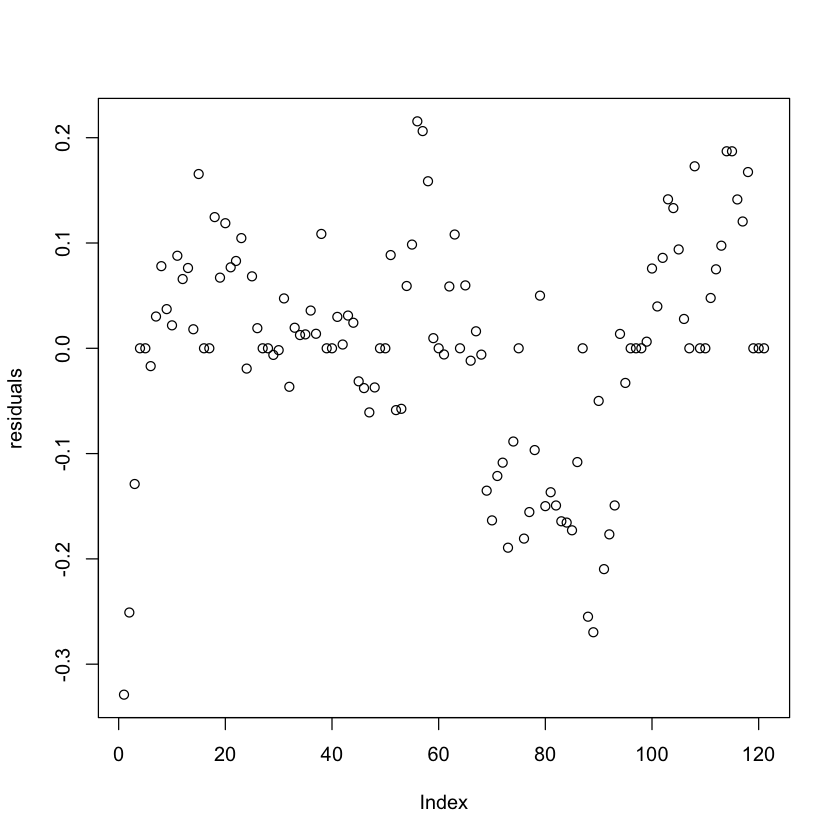

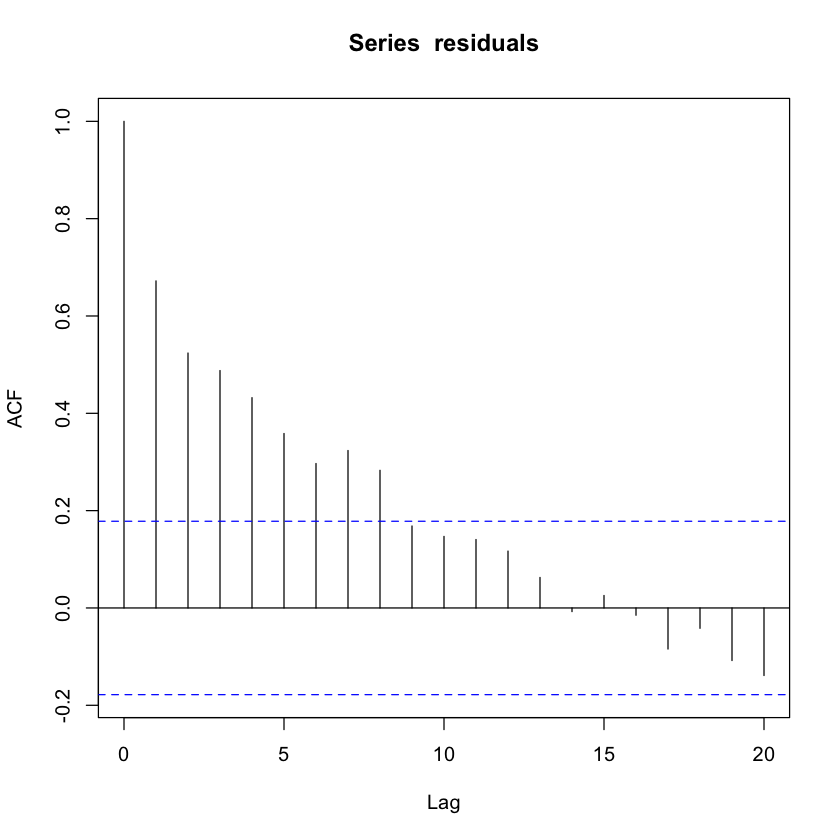

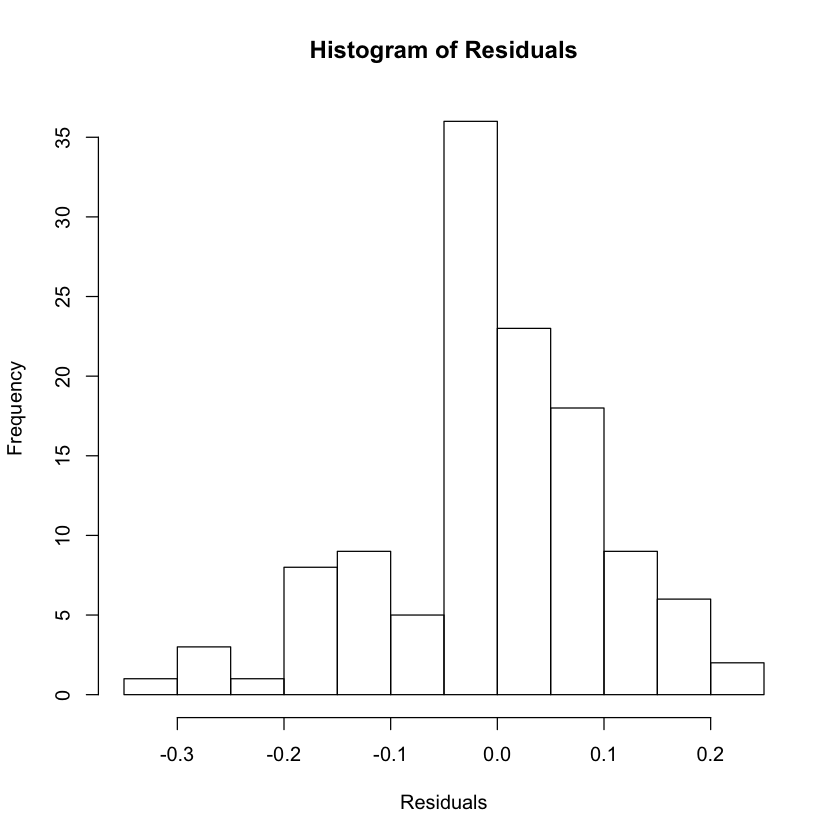

In [168]:

ramazan_month <- as.integer(hw1_copy2$Ramazan)

# Creating dummy variables for monthly seasonality of Ramazan
ramazan_dummies <- model.matrix(~ factor(ramazan_month) - 1)
mean <- mean(hw11data_copy1$Sephora)
dif <- c(mean, hw11data_copy1$Sephora[1:120])
hw1_copy2$trend <- 1:121
model_new2 <- lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + İssizlik + CiltBakım + trend + ramazan_dummies, data = hw1_copy2)
summary(model_new2)
residuals <- residuals(model_new2)
plot(residuals)
acf(residuals)
hist(residuals, main = "Histogram of Residuals", xlab = "Residuals")

Warning message:
“not plotting observations with leverage one:
  4, 5, 16, 17, 27, 28, 39, 40, 49, 50, 60, 64, 75, 87, 96, 97, 98, 107, 109, 110, 119, 120, 121”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + İssizlik + CiltBakım + tre ...' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + İssizlik + CiltBakım + tre ...' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + İssizlik + CiltBakım + tre ...' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + İssizlik + CiltBakım + tre ...' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in title(sub = sub.caption, ...):
“c

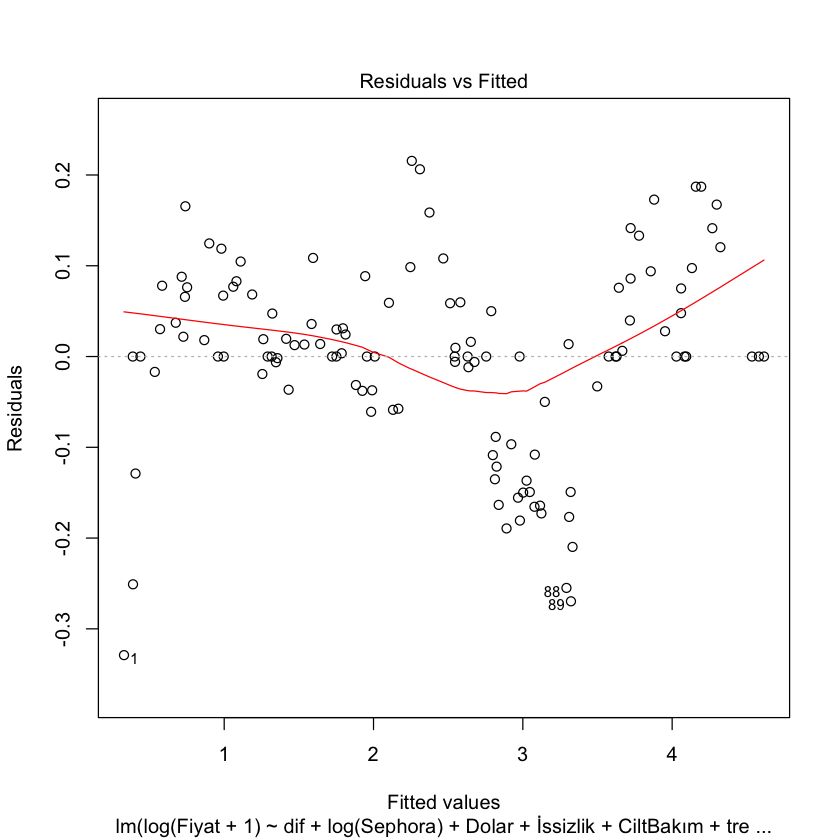

Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + İssizlik + CiltBakım + tre ...' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + İssizlik + CiltBakım + tre ...' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + İssizlik + CiltBakım + tre ...' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + İssizlik + CiltBakım + tre ...' in 'mbcsToSbcs': dot substituted for <b1>”Warning message:
“not plotting observations with leverage one:
  4, 5, 16, 17, 27, 28, 39, 40, 49, 50, 60, 64, 75, 87, 96, 97, 98, 107, 109, 110, 119, 120, 121”

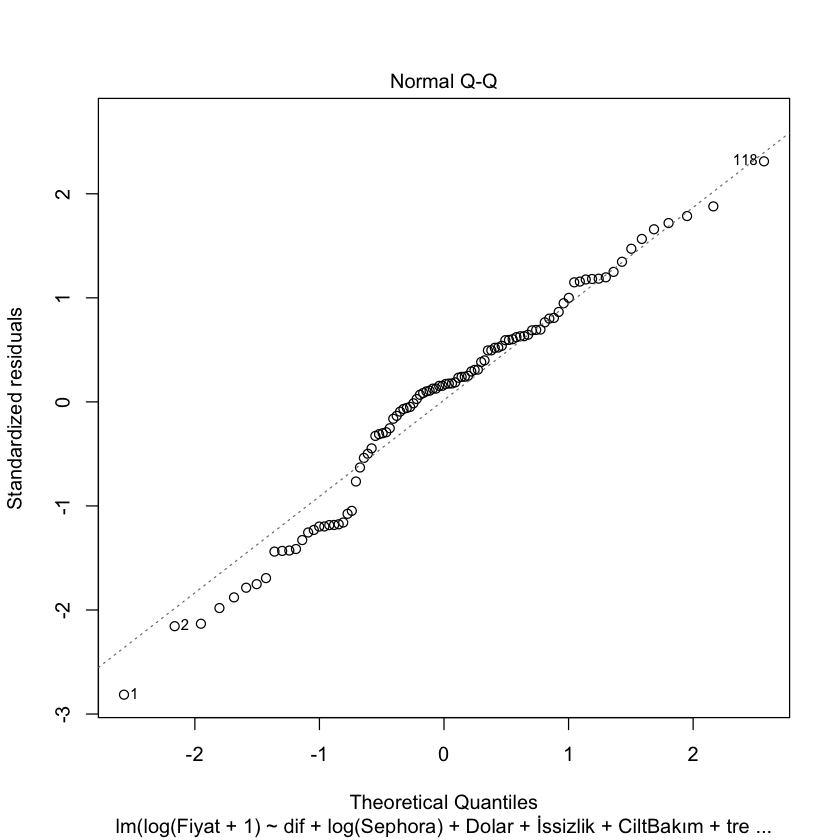

Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + İssizlik + CiltBakım + tre ...' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + İssizlik + CiltBakım + tre ...' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + İssizlik + CiltBakım + tre ...' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in title(sub = sub.caption, ...):
“conversion failure on 'lm(log(Fiyat + 1) ~ dif + log(Sephora) + Dolar + İssizlik + CiltBakım + tre ...' in 'mbcsToSbcs': dot substituted for <b1>”

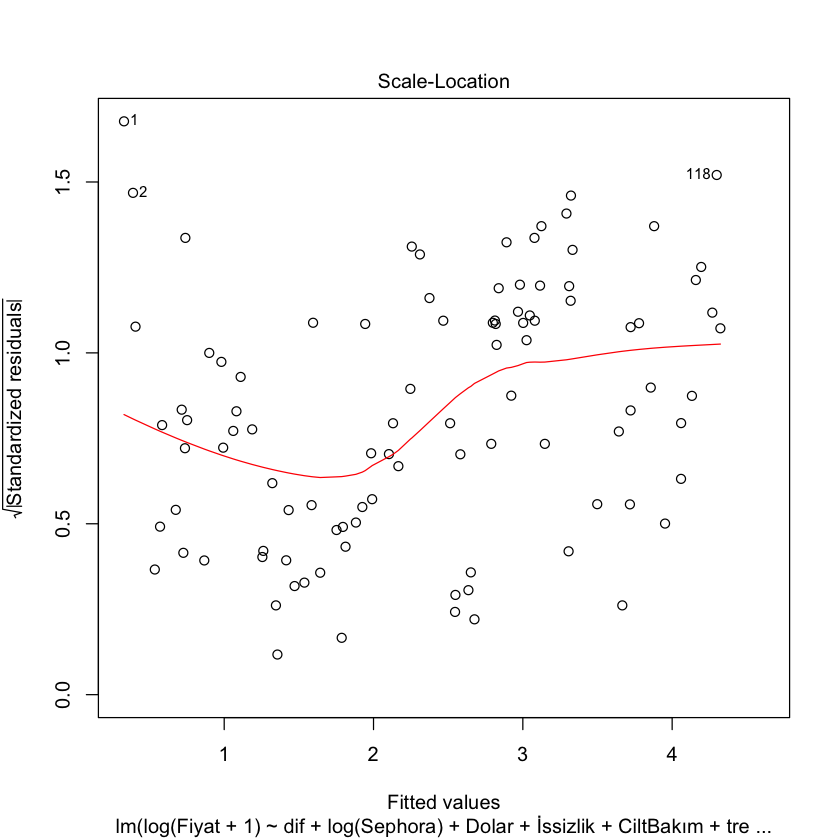

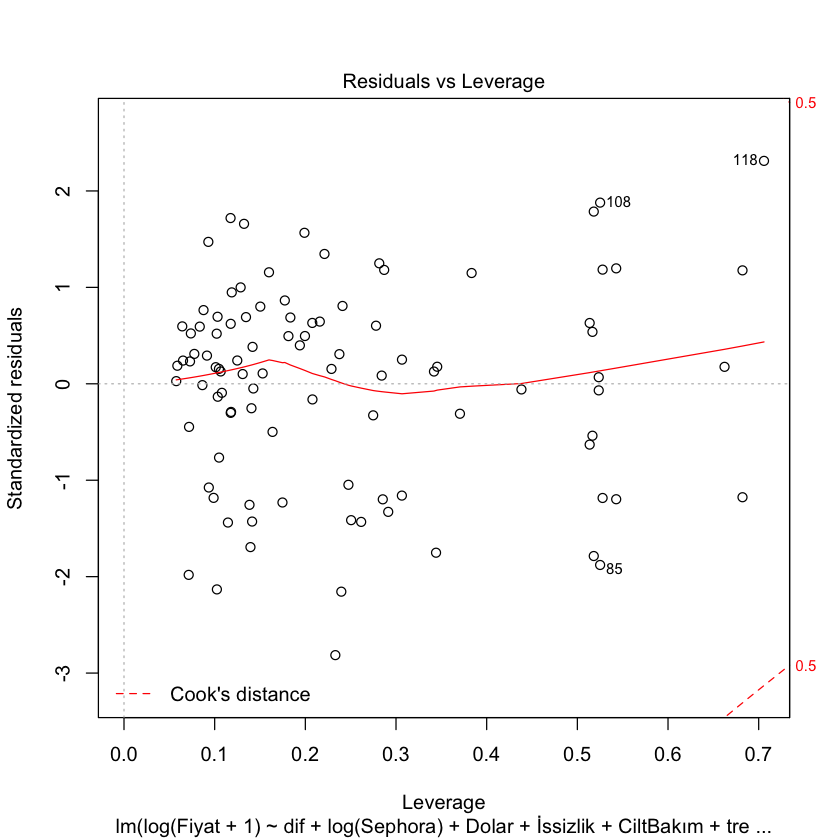

In [169]:
plot(model_new2)

After adding the dummy variables for seasonality in Ramazan, the residuals seem to be improved in terms of getting closer to having constant variance. Other than that, there doesn't seem to be any significant improvement to our model compared with the no seasonality added models. Trend coefficient is the most significant one, all the other coefficients are not significant for our model. 

In conclusion, the problem for nonlinearity is not perfectly solved. Residuals' histogram shows that they are left skewed. Further modification is needed for our model to solve this skeweness. Also, the curvature in residual plot is still there even after various transformations and adding dummy variables. Even though, our model is shown to be significant compared to a model with no coefficients with its high F statistic value, and high R squared value, it is not a good model due to constant variance assumption for residuals being violated.  